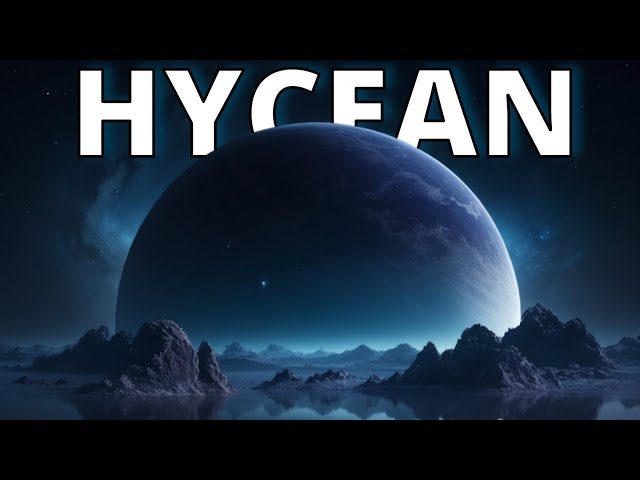

# LEGEND

    📚 Library

    🔧 Own First Level Functions
    🛠️ Own Second Level Functions
 
    📄 Important Theory and documentation for better understanding
    📝 Explanation of use or  results obtained
    📋 Reflections

    📍  Point in method
    📌 Point in Table of Contents
    🎯 Solution

    📊 Graphic Information
    💾 Save / Load 

    ❗  Important

# TABLE OF CONTENTS

1. RESEARCH QUESTION 
2. BOARD & TOOLS
3. DATA MINING 
4. DATA INITIAL EXPLORATION
5. DATA CLEANING
6. DATA EXPLORATION
7. FEATURE ENGINEERING
8. CLUSTERING MODEL
9. DATA VISUALIZATION



# RESEARCH QUESTION

# BOARD & TOOLS

##  Board

In [224]:
# Basic Modules & Useful Installations:
import warnings
warnings.simplefilter(action='ignore')


In [225]:
#Basic Libraries 📚

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

#Visualization Libraries 📚

import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

#Basic Statistics 📚

import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# Machine Learning 📚

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [226]:
#Options & Other modules 
pd.set_option('display.max_columns', None)
#pd.options.display.float_format = '{:.2e}'.format

## Tools

In [228]:
# Completed Caracterization 🔧 

def data_caracterization():
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    return df.head(5)

In [229]:
# Sum & Return duplicates, NaN & two empty spaces 🔧 

def data_explore(df):  
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")
    return exploration

In [230]:
# Sum & Return duplicates, NaN & two empty spaces after data cleaning and transformation 🔧  

def data_final_explore(df): 
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")#

In [231]:
# Function to remove the second comma from a string 🔧  

def remove_second_comma(string):
    first_comma = string.find(',')
    second_comma = string.find(',', first_comma + 1)
    if second_comma != -1:
        return string[:second_comma] + string[second_comma + 1:]
    else:
        return string


In [232]:
# Function to create several crosstab with multindex in columns 🔧

def cross_tab_maker(target, df):
    crosstab_list = []  
    for column in df:
        crosstab = pd.crosstab(target, df[column])
        crosstab.columns = pd.MultiIndex.from_product([[column], crosstab.columns])
        crosstab_list.append(crosstab)
    crosstab_df = pd.concat(crosstab_list, axis=1)
    return crosstab_df

In [233]:
# Multi chi-quadrado and Cramer V tests 🛠️

def categorical_rel_chi_cram_tests(crosstab_df, flag_columns):
    for column in flag_columns:
        sub_df = pd.DataFrame(crosstab_df[column])
        _, p_value, _, _ = chi2_contingency(sub_df)
        cramer = association(sub_df, method='cramer')
        print(f'Chi-square (χ²) test for {column} is {p_value}')
        print(f'Cramers V test for {column} is {cramer}\n')

In [234]:
# Saphiro_test: 🔧

def saphiro_tests (df):
    for column in df:
        _,shapiro_p_value = st.shapiro(df[column])
        print(f'The P-value for feature {column} is: {shapiro_p_value}')
        if shapiro_p_value < 0.05:
            print(f'The test results {shapiro_p_value} indicate that the distribution of {column} is significantly different from a normal distribution.\n')
        else:
            print(f'The test results {shapiro_p_value} indicateh that the distribution of {column} is not significantly different from a normal distribution.\n')

In [235]:
# Kurtosis_test: 🔧

def kurtosis_tests (df):
    for column in df:
        kurt = df[column].kurtosis()
        if kurt < 3:
            print(f'Feature {column} has a Kurtosis Value of {kurt}, is platykurtic\n')
        elif kurt > 3:
            print(f'Feature {column} has a Kurtosis Value of {kurt}, is leptokurtic\n')
        else:
            print(f'The distribution of {column} is not significantly different from a normal distribution.\n')

In [236]:
# Skewed_test: 🔧

def skewed_tests (df):
    for column in df:
        skew = df[column].skew()
        if skew > 0:
            print(f'Feature {column} has a positive skew Value of {skew}, so distribution has long-left tail.\n')
        elif skew < 0:
            print(f'Feature {column} has a positive skew Value of {skew}, so distribution has long-right tail.\n')
        else:
            print(f'The distribution of {column} is not significantly different from a normal distribution.\n')

In [237]:
# Automatically removes outliers based on Q1, Q3 🔧

def outlier_slayer(data): 
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [238]:
# Automatically removes outliers based on Q1, Q3 🔧

def right_outlier_slayer(data): 
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [239]:
# Kruskal tests: 🔧

def kruskal_tests (group1, group2):
    alpha=0.05
    _, p_value = st.kruskal(group1, group2)
    print(f'The P-value for this groups is: {p_value}')
    if p_value > alpha:
        print("We are not able to reject the null hypothesis")
    else:
        print("We reject the null hypothesis")

# DATA READING

In [241]:
data = pd.read_csv("./data/exoplanets_retrived_2024_Feb - final.csv")
df = data.copy()

# DATA INITIAL EXPLORATION

In [243]:
data_caracterization()

Caracterization:

Number of Rows: 5587

Number of Columns: 45

Columns Names/Variables/Features: ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_bmassprov', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag', 'pl_ratdor', 'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio', 'st_logg', 'rastr', 'ra', 'decstr', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5587 entries, 0 to 5586
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5587 non-null   object 
 1   hostname         5587 non-null   object 
 2   sy_snum          5587 non-null   int64  
 3   sy_pnum 

pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  rv_flag  pul_flag  ptv_flag  \
0                        Xinglong Station        1         0         0   
1  Thueringer Landessternwarte Tautenburg        1         0         0   
2       Okayama Astrophysical Observatory        1         0         0   
3                  W. M. Keck Observatory        1         0         0   
4                  Multiple Observatories        1         0         0   

   tran_flag  ast_flag  obm_flag  micro_flag  etv_flag  ima_flag  dkin_flag  \
0          0         0         0           0         0         0          0   
1          0         0         0           0         0         0          0   
2          0         0         0           0         0         0          0   
3          0         0         0           0         0         0          0   
4          0         0         0           0         0         0          0   

   pl_controv_flag        pl_orbper pl_orbsmax pl_rade pl_radj    pl_bmasse  \
0                0   32,321,000,000  1,178,000  12,200   1,090  491,489,849   
1                0   51,621,997,000  1,530,000  12,300   1,090  468,481,420   
2                0   18,676,000,000   0.775000  13,100   1,160  113,115,130   
3                0  176,503,890,000  2,774,000  12,600   1,120  255,947,216   
4                0   79,850,000,000  1,660,000  13,500   1,200   56,573,740   

   pl_bmassj pl_bmassprov  pl_orbeccen  pl_insol  pl_eqt  ttv_flag pl_ratdor  \
0  1,546,400        Msini        0.238       NaN     NaN         0       NaN   
1  1,474,000        Msini        0.080       NaN     NaN         0       NaN   
2    355,900        Msini        0.000       NaN     NaN         0       NaN   
3    805,300         Mass        0.373       NaN     NaN         0       NaN   
4    178,000        Msini        0.680       NaN     NaN         0       NaN   

  st_spectype  st_teff  st_rad  st_mass  st_met st_metratio  st_logg  \
0      G8 III   4874.0   13.76     2.09  -0.260      [Fe/H]     2.45   
1      K4 III   4213.0   29.79     2.78  -0.020      [Fe/H]     1.93   
2      K0 III   4888.0   11.55     1.78  -0.210      [Fe/H]     2.55   
3        K0 V   5338.0    0.93     0.91   0.405      [Fe/H]     4.45   
4        G3 V   5750.0    1.13     1.08   0.060      [Fe/H]     4.36   

          rastr             ra         decstr          dec        sy_dist  \
0  12h20m42.91s  1,851,787,793  +17d47m35.71s  177,932,516    931,846,000   
1  15h17m05.90s  2,292,745,954  +71d49m26.19s  718,239,428  1,253,210,000   
2  23h31m17.80s  3,528,241,500  +39d14m09.01s  392,358,367    754,392,000   
3  16h10m24.50s  2,426,021,014  +43d48m58.90s  438,163,621    179,323,000   
4  19h41m51.75s  2,954,656,422  +50d31m00.57s  505,168,243    211,397,000   

      sy_vmag     sy_kmag  sy_gaiamag  
0  47,230,700  22,820,000  44,403,800  
1  50,130,000  19,390,000  45,621,600  
2  52,313,300  23,310,000  49,178,100  
3  66,193,500  47,140,000  63,830,000  
4  62,150,000  46,510,000  60,642,800

*Columns Documentation* > [NASA Exoplanet Archive - Columns Documentation](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html)

## STANDARIZATION AND FIRST SELECTION



- Remove empty columns and columns with non-relevant information for our analysis.

- Formatting to lower.case columns and clean empty spaces in columns names. 📌(No necessary)

- Data Standarization of Planetary Data. 📌( .csv download with decimals separated errors)

- Remove all empty rows.
    


In [247]:
#Remove empty columns and columns with non-relevant information for our analysis.

trash = ['hostname', 'sy_pnum', 'disc_facility', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'pl_controv_flag', 'pl_radj', 'pl_bmassj', 'pl_bmassprov', 'st_teff', 'st_met', 'st_metratio', 'st_logg', 'rastr', 'ra', 'decstr', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag','dkin_flag']
df= df.drop(trash, axis=1)

In [248]:
# Data Standarization of Planetary Data - Error in dataset for Planet Period Orbiter and Planet Best Massa.

df['pl_orbper'] = df['pl_orbper'].str.replace(',', '')
df['pl_orbper'] = df['pl_orbper'].astype(float)
df['pl_orbper'] = df['pl_orbper'] / 100000000

df['pl_bmasse'] = df['pl_bmasse'].str.replace(',', '')
df['pl_bmasse'] = df['pl_bmasse'].astype(float)
df['pl_bmasse'] = df['pl_bmasse'] / 100000

In [249]:
#Remove all empty rows.

df = df.dropna(how='all')

# 📍 No empty rows in Exoplanet dataset 

# DATA CLEANING


- Cleaning nulls and duplicates. Estrategies

- Special Eccentricity case 📝

- Addressing empty spaces and unintelligible and inconsistent data. 📌(No necessary)

- Type transformations, setting the index and reorder columns.
    


In [252]:
df2 = df.copy()

In [253]:
#Cleaning nulls and duplicates.

data_explore(df2)

There are 0 duplicate rows. Also;


NaN  EmptySpaces
pl_name             0            0
sy_snum             0            0
discoverymethod     0            0
disc_year           0            0
rv_flag             0            0
pul_flag            0            0
ptv_flag            0            0
tran_flag           0            0
ast_flag            0            0
pl_orbper         249            0
pl_orbsmax        295            0
pl_rade            19            0
pl_bmasse          25            0
pl_orbeccen       775            0
pl_insol         1708            0
pl_eqt           1463            0
ttv_flag            0            0
pl_ratdor        1531            0
st_spectype      3571            0
st_rad            240            0
st_mass             4            0

 📝 **Low NaN value counts:** 
     Delete rows if sum is less than 300 nulls, and feature is important. 
     pl_orbeccen (Eccentricity) is a special case.
     
 📝 **High null value counts:** 
     Delete no important columns with NaN, other columns will be cut in other dataframe.

In [255]:
#Low NaN value counts:

drop_rows_per_column = ["pl_orbper", "pl_orbsmax", "pl_rade", "pl_bmasse", "st_rad", "st_mass"]

for column in drop_rows_per_column:
    df2 = df2.dropna(subset=column, how="any")

#High null value counts:

drop_columns_per_nans =["st_spectype", "pl_eqt", "pl_insol", "pl_ratdor"]

df2 = df2.drop(columns = drop_columns_per_nans , axis=1)

data_explore(df2)

There are 0 duplicate rows. Also;


NaN  EmptySpaces
pl_name            0            0
sy_snum            0            0
discoverymethod    0            0
disc_year          0            0
rv_flag            0            0
pul_flag           0            0
ptv_flag           0            0
tran_flag          0            0
ast_flag           0            0
pl_orbper          0            0
pl_orbsmax         0            0
pl_rade            0            0
pl_bmasse          0            0
pl_orbeccen      291            0
ttv_flag           0            0
st_rad             0            0
st_mass            0            0

In [256]:
# 📝 Special Eccentricity case: 

mean_eccen = df2["pl_orbeccen"].mean().round(3)
std = df2["pl_orbeccen"].std()
var = df2["pl_orbeccen"].var()
kurt_eccen = df2["pl_orbeccen"].kurtosis().round(3)
skew_eccen = df2["pl_orbeccen"].skew().round(3)

q1 = df2["pl_orbeccen"].quantile(0.25).round(3)  
q2 = df2["pl_orbeccen"].quantile(0.5).round(3)  
q3 = df2["pl_orbeccen"].quantile(0.75).round(3)


print(f'Eccentricity mean is: {mean_eccen}')
print(f'Eccentricity Standard Deviation is is: {std}')
print(f'Eccentricity Varianza is: {var}')
print(f'Eccentricity Q1: {q1}')
print(f'Eccentricity Q2: {q2}')
print(f'Eccentricity Q3: {q3}')
print(f'Eccentricity Kurtosis is: {kurt_eccen}')
print(f'Eccentricity Skewness is: {skew_eccen}')

Eccentricity mean is: 0.075
Eccentricity Standard Deviation is is: 0.14932945448277712
Eccentricity Varianza is: 0.022299285976123805
Eccentricity Q1: 0.0
Eccentricity Q2: 0.0
Eccentricity Q3: 0.087
Eccentricity Kurtosis is: 8.127
Eccentricity Skewness is: 2.722


📝 Using fillna() with the mean for the Eccentricity values is justified because the distribution of Eccentricity is positively skewed (Skewness = 2.722), indicating a longer right tail. Filling missing values with the mean ensures that the central tendency of the data is preserved, which is appropriate given the distribution's characteristics. Additionally, the mean value (0.075) provides a reasonable estimate for the missing data, considering the mean's robustness as a measure of central tendency

In [258]:
df2["pl_orbeccen"].fillna( mean_eccen, inplace=True)
data_explore(df2)

There are 0 duplicate rows. Also;


NaN  EmptySpaces
pl_name            0            0
sy_snum            0            0
discoverymethod    0            0
disc_year          0            0
rv_flag            0            0
pul_flag           0            0
ptv_flag           0            0
tran_flag          0            0
ast_flag           0            0
pl_orbper          0            0
pl_orbsmax         0            0
pl_rade            0            0
pl_bmasse          0            0
pl_orbeccen        0            0
ttv_flag           0            0
st_rad             0            0
st_mass            0            0

In [259]:
#Addressing empty spaces and unintelligible and inconsistent data.
df2.eq(" ").sum()

pl_name            0
sy_snum            0
discoverymethod    0
disc_year          0
rv_flag            0
pul_flag           0
ptv_flag           0
tran_flag          0
ast_flag           0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_bmasse          0
pl_orbeccen        0
ttv_flag           0
st_rad             0
st_mass            0
dtype: int64

In [260]:
# Type transformations, setting the index and reorder columns.

df2['pl_rade'] = df2['pl_rade'].str.replace(',', '.')
df2['pl_rade'] = df2['pl_rade'].astype(float)

df2['pl_orbsmax'] = df2['pl_orbsmax'].apply(remove_second_comma)
df2['pl_orbsmax'] = df2['pl_orbsmax'].apply(remove_second_comma) # 📍 Delete third , as decimal separated after one loop
df2['pl_orbsmax'] = df2['pl_orbsmax'].str.replace(',', '.')
df2['pl_orbsmax'] = df2['pl_orbsmax'].astype(float)


In [261]:
df2 = df2.set_index('pl_name')

In [262]:
# 📍 After filter and selection: df2["disc_year"] = df2["disc_year"].astype(str) 

## DATA FILTERED AND SELECTION

📝 Creating a new DataFrame named **contrast_df** with columns containing NaN values  serves multiple purposes:

**Data Separation**: By isolating columns with NaN values and irrelevant data into a separate DataFrame, you maintain clarity and organization in your data analysis workflow. This separation allows you to focus on relevant data without interference from irrelevant or missing values.
**Data Contrast**: We would contrast **st_spectype**  if there is spectogram of the exoplanets results with this DataFrame.

**Prioritization of Data**: Prioritize data that is most relevant to habitability assessment while excluding or downplaying data that does not significantly contribute to the EDA analysis.


In [265]:
contrast_df = pd.concat([df["pl_name"],df["st_spectype"],df["pl_ratdor"]], axis=1)

In [266]:
contrast_df["st_spectype"].fillna("No spect", inplace=True)
contrast_df["pl_ratdor"].fillna("No ratio", inplace = True)

In [267]:
contrast_df = contrast_df.set_index('pl_name')

# DATA EXPLORATION (EDA)

## UNIVARIATE ANALYSIS

### General Categorical Variables

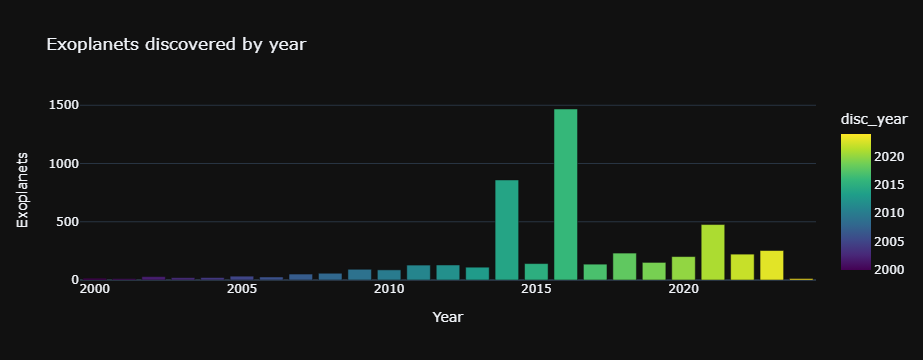

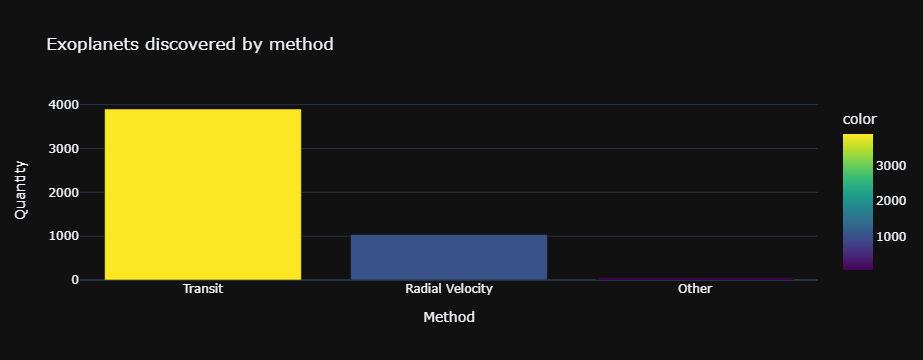

In [271]:
# Graphical discovery_method consolidation.

discovery_method = df2["discoverymethod"].apply(lambda x: x if x in ["Transit", "Radial Velocity"] else "Other").value_counts()
discovery_method

# Treat as categorical, and filter by year 2000.

discovered_year = df2[df2["disc_year"] >= 2000]["disc_year"].value_counts()


# Graphic Exoplanets discovered by year. 📊 

fig = px.bar(discovered_year, x=discovered_year.index, y=discovered_year.values, title="Exoplanets discovered by year", template="plotly_dark",
             color=discovered_year.index, color_continuous_scale='viridis')

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Exoplanets")
fig.show()


# Graphic Exoplanets discovered by method. 📊 

fig = px.bar(discovery_method, x=discovery_method.index, y=discovery_method.values, title="Exoplanets discovered by method", template="plotly_dark",
             color = discovery_method.values, color_continuous_scale='viridis')

fig.update_xaxes(title_text="Method")
fig.update_yaxes(title_text="Quantity")
fig.show()


# Final Transformation of disc_year.

df2["disc_year"] = df2["disc_year"].astype(str)

### Other Categorical Variables in contrast_df

![Stellar Classification](./images/stellar_classification_chart.png)


 📝 **Stellar classification, habitability, and the search for life**
 
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. Electromagnetic radiation from the star is analyzed by splitting it with a prism or diffraction grating into a spectrum exhibiting the rainbow of colors interspersed with spectral lines. Each line indicates a particular chemical element or molecule, with the line strength indicating the abundance of that element. 

Most stars are currently classified under the Morgan–Keenan (MK) system using the letters O, B, A, F, G, K, and M, a sequence from the hottest (O type) to the coolest (M type)
 
Of the main-sequence star types, stars more massive than 1.5 times that of the Sun (spectral types O, B, and A) age too quickly for advanced life to develop (using Earth as a guideline). On the other extreme, dwarfs of less than half the mass of the Sun (spectral type M) are likely to tidally lock planets within their habitable zone, along with other problems (see Habitability of red dwarf systems). While there are many problems facing life on red dwarfs, many astronomers continue to model these systems due to their sheer numbers and longevity.

For these reasons NASA's Kepler Mission is searching for habitable planets at nearby main-sequence stars that are less massive than spectral type A but more massive than type M—making the most probable stars to host life dwarf stars,those having a low mass of between 0.08 and 0.8M☉, of types
F, G, and K. 

*Font* > [Stellar classification - Wikipedia](https://en.wikipedia.org/wiki/Stellar_classification#:~:text=Most%20stars%20are%20currently%20classified,the%20coolest%20(M%20type).)


📝**Ratio of Semi-Major Axis to Stellar Radius**

The distance between the planet and the star at mid-transit divided by the stellar radius. For the case of zero orbital eccentricity, the distance at mid-transit is the semi-major axis of the planetary orbit.

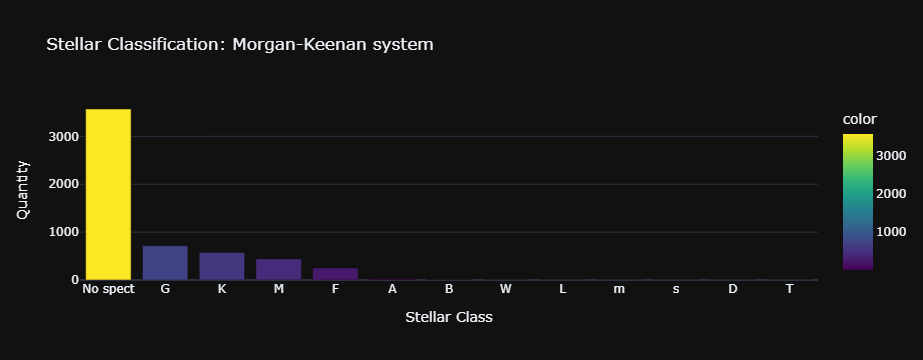

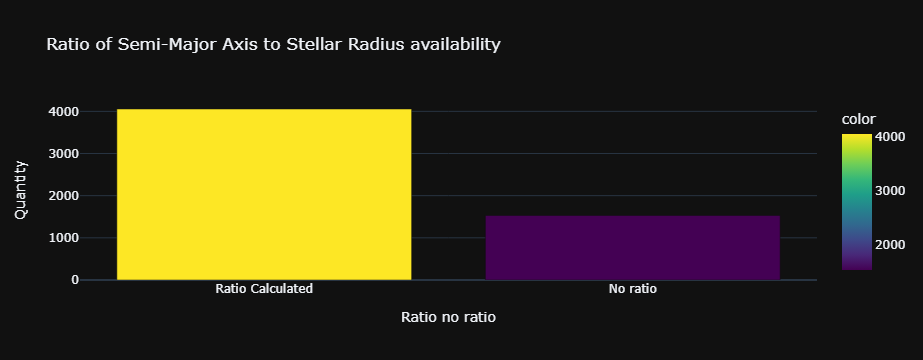

In [276]:
# Graphical st_spectype consolidation 

contrast_df["st_spectype"] = contrast_df["st_spectype"].apply(lambda x: x[0] if x != "No spect" else x)
stellar_classification = contrast_df["st_spectype"].value_counts()

# Stellar Classification: Morgan-Keenan system. 📊 

fig = px.bar(stellar_classification, x=stellar_classification.index, y=stellar_classification.values, 
             title="Stellar Classification: Morgan-Keenan system", template="plotly_dark",
             color = stellar_classification.values, color_continuous_scale='viridis')

fig.update_xaxes(title_text="Stellar Class")
fig.update_yaxes(title_text="Quantity")

fig.show()


# Graphical st_spectype consolidation 

ratio_noratio =  contrast_df["pl_ratdor"].apply(lambda x: x if x == "No ratio" else "Ratio Calculated").value_counts()

# Graphic Ratio of Semi-Major Axis to Stellar Radius availability. 📊 

fig = px.bar(ratio_noratio, x=ratio_noratio.index, y=ratio_noratio.values, 
             title="Ratio of Semi-Major Axis to Stellar Radius availability", template="plotly_dark",
             color = ratio_noratio.values, color_continuous_scale='viridis')

fig.update_xaxes(title_text="Ratio no ratio")
fig.update_yaxes(title_text="Quantity")

fig.show()

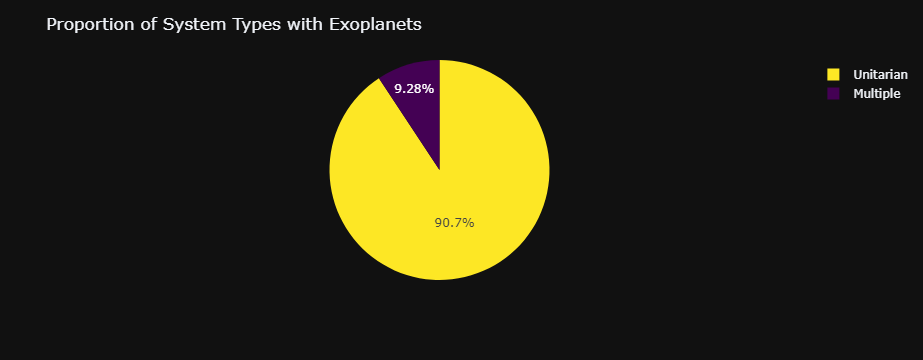

4525 exoplanets detections were realized in one-star systems.
It was detected 403 exoplanets in binarian systems.
It was detected 58 exoplanets in trinarian systems.
It was detected 2 exoplanets in quaternarian systems.


In [277]:
# Stellar System Type (sy_snum variable)

bins = [0, 1, df2["sy_snum"].max()]
labels = ["Unitarian", "Multiple"]

system_type = pd.cut(df2["sy_snum"], bins=bins, labels=labels)
proportion = system_type.value_counts(normalize = True)

# Graphic Proportion of System Types with Exoplanets 📊

colors_pie = ["#fde725", "#440154"]

fig = px.pie(names=labels, values=proportion.values)
fig.update_layout(title="Proportion of System Types with Exoplanets", template="plotly_dark",)
fig.update_traces(marker=dict(colors=colors_pie))

fig.show()

print(f'{df2["sy_snum"].value_counts()[1]} exoplanets detections were realized in one-star systems.')
print(f'It was detected {df2["sy_snum"].value_counts()[2]} exoplanets in binarian systems.')
print(f'It was detected {df2["sy_snum"].value_counts()[3]} exoplanets in trinarian systems.')
print(f'It was detected {df2["sy_snum"].value_counts()[4]} exoplanets in quaternarian systems.')

### Numerical Variables (Continuous)

In [279]:
# Numerical continuous variables where divided in star system features and exoplanets.

star_system =["sy_snum", "st_rad", "st_mass"]
exoplanet_features = ["pl_orbper", "pl_orbsmax", "pl_rade", "pl_bmasse","pl_orbeccen"]
star_exoplanet_features = ["pl_orbper", "pl_orbsmax", "pl_rade", "pl_bmasse","pl_orbeccen","st_rad", "st_mass"]

In [280]:
stars_df = df2.filter(items=star_system).copy()
exoplanet_features_df = df2.filter(items=exoplanet_features).copy()
star_exoplanet_features_df = df2.filter(items=star_exoplanet_features).copy()

**Star and System Features**

In [282]:
print(f'Descriptive statistics of Star Systems with Exoplanets:\n')
df2[(star_system)].describe().round(2).T 

Descriptive statistics of Star Systems with Exoplanets:



count  mean   std   min   25%   50%   75%     max
sy_snum  4988.0  1.11  0.35  1.00  1.00  1.00  1.00    4.00
st_rad   4988.0  1.58  4.34  0.01  0.78  0.96  1.25  109.46
st_mass  4988.0  0.97  0.40  0.01  0.81  0.96  1.10   10.94

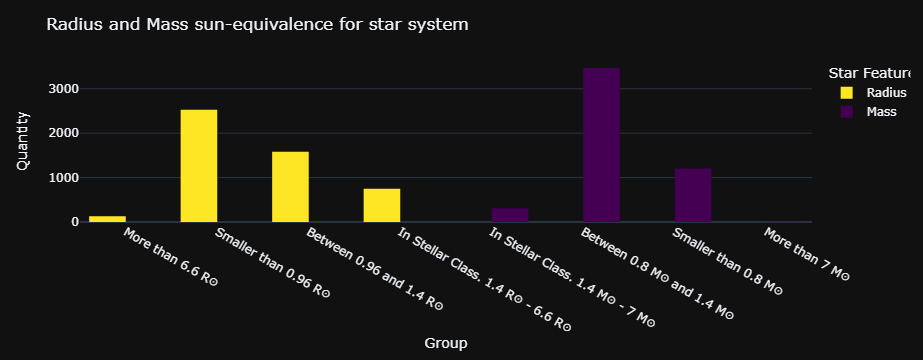

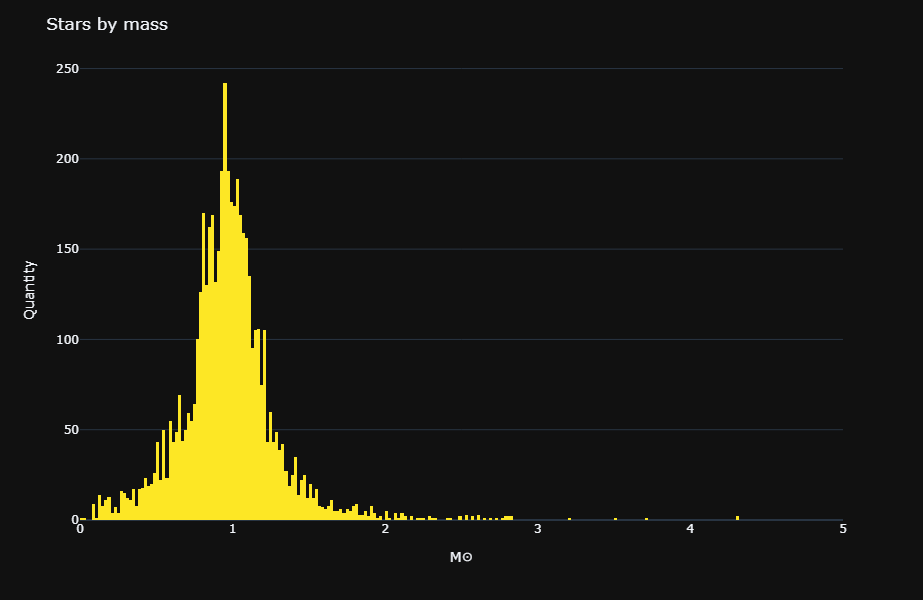

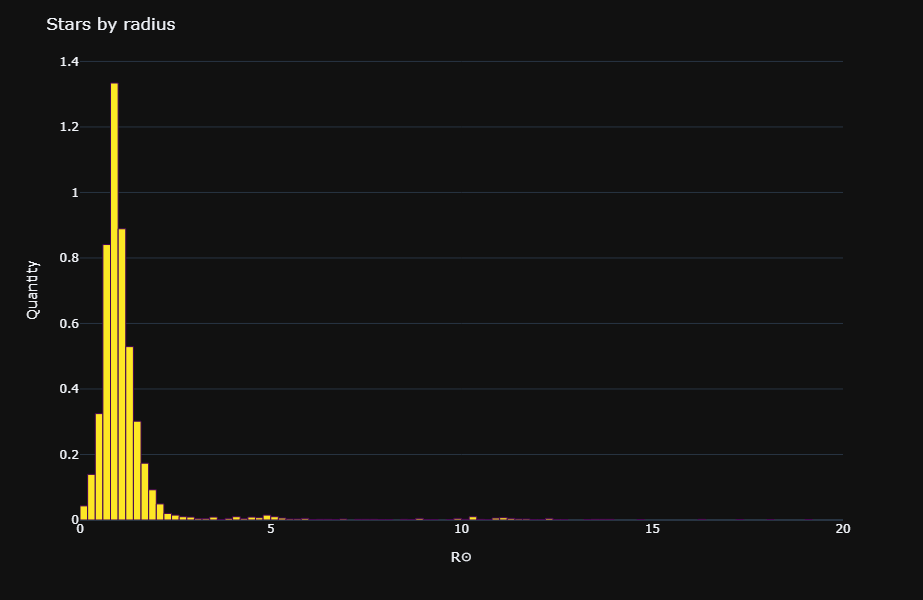

In [283]:
# Stellar Radius and Stellar Mass (st_rad & st_mass)

bins2 = [df2["st_rad"].min(),0.96, 1.4, 6.6, df2["st_rad"].max()]
labels2 = ["Smaller than 0.96 R☉", "Between 0.96 and 1.4 R☉", "In Stellar Class. 1.4 R☉ - 6.6 R☉", "More than 6.6 R☉"]
sun_radio = pd.cut(df2["st_rad"], bins=bins2, labels=labels2)
proportion2 = sun_radio.value_counts(normalize = True)
sun_radio_df = pd.DataFrame(sun_radio)

bins3 = [df2["st_mass"].min(),0.8, 1.4, 7, df2["st_mass"].max()]
labels3 = ["Smaller than 0.8 M☉", "Between 0.8 M☉ and 1.4 M☉", "In Stellar Class. 1.4 M☉ - 7 M☉", "More than 7 M☉"]
sun_mass = pd.cut(df2["st_mass"], bins=bins3, labels=labels3)
proportion3 = sun_mass.value_counts(normalize = True)
sun_mass_df = pd.DataFrame(sun_mass)

# Similarity to Sun DataFrame Construction

similarity_to_sun_df = pd.concat([sun_radio_df, sun_mass_df], axis=0)
similarity_to_sun_df = similarity_to_sun_df.rename(columns={'st_rad': 'Radius', 'st_mass': 'Mass'})

similarity_melted = similarity_to_sun_df.melt(var_name='Star Feature', value_name='Stellar Class')

# Graphic Radius and Mass sun-equivalence for star system 📊

colors_star = {'Radius': "#fde725", 'Mass': "#440154"}

fig = px.histogram(similarity_melted, x='Stellar Class', color='Star Feature', barmode='group', color_discrete_map=colors_star)
fig.update_layout(title='Radius and Mass sun-equivalence for star system', xaxis_title='Group', yaxis_title='Quantity', template="plotly_dark")
fig.show()

# Graphic Stars by mass 📊

colors = ["#fde725"]

fig = px.histogram(df2, x=df2["st_mass"], color_discrete_sequence=colors, nbins=1000, histfunc='count')
fig.update_layout(title='Stars by mass', xaxis_title='M☉', yaxis_title='Quantity', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[0, 5])  # Set the x-axis range from 0 to 20
fig.show()

# Graphic Stars by radius 📊

colors = ["#fde725","#fde725","#21918c"]
edgecolor = ["#440154","#3b528b"]

fig = px.histogram(df2, x=df2["st_rad"], color_discrete_sequence=colors, nbins=1000, histnorm='probability density', histfunc='count')
fig.update_traces(marker=dict(color=colors[0], line=dict(color=edgecolor[0], width=1)))
fig.update_layout(title='Stars by radius', xaxis_title='R☉', yaxis_title='Quantity', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[0, 20])  # Set the x-axis range from 0 to 20
fig.show()

📝 

**Star Radius (st_rad):**


The average star radius is approximately 1.58 with a standard deviation of 4.34, indicating a wide variability in star sizes.

There are extreme values in the dataset, with the maximum observed star radius being 109.46, suggesting the presence of outliers.
The interquartile range (IQR), represented by the difference between the 25th (0.78) and 75th (1.25) percentiles, is relatively narrow, indicating that most star radii fall within a certain range.

Further investigation may be needed to understand the nature of extreme values and outliers in the data.

**Star Masses (st_mass):**

The average star mass is approximately 0.97 with a standard deviation of 0.40, suggesting moderate variability in star masses.

The distribution of star masses appears to be approximately symmetric, as the mean is close to the median.Similar to star radius, there are extreme values in the dataset, with the maximum observed star mass being 10.94.

The interquartile range (IQR) for star masses is relatively narrow, indicating that most star masses fall within a certain range. (0.81-1.10)



**Exoplanet Features**

In [286]:
# Calculate the centrality measures of the related exoplanet columns.

mean_values = df2[exoplanet_features].mean().round(2)
median_values = df2[exoplanet_features].median().round(2)

# Calculate the dispersion measures of the related exoplanet columns.

std_values = df2[exoplanet_features].std().round(2)
variance_values = df2[exoplanet_features].var().round(2)

# Find the minimum and maximun values in the exoplanet related columns.

min_values = df2[exoplanet_features].min()
max_values = df2[exoplanet_features].max().round(2)

# Calculate the quantiles:

q1 = df2[exoplanet_features].quantile(0.25).round(3)  
q2 = df2[exoplanet_features].quantile(0.5).round(3)  
q3 = df2[exoplanet_features].quantile(0.75).round(3)


# Create a Dataframe with centrality and dispersion measures
measures_df = pd.DataFrame({'Mean': mean_values,'Median': median_values,'Std. Deviation': std_values, 'Variance': variance_values, 'Maximun': max_values,'Minimun': min_values, 'Q1': q1, 'Q2': q2,'Q3':q3})

# Rows renaming
new_index_names = ['Orbital Period(days)', 'Orbit Semi-Major Axis (au)', 'Planet Radius (Earth Radius)', 'Best Planet Mass Stimation (Earth Mass)','Eccentricity(au)']
measures_df.rename(index=dict(zip(measures_df.index, new_index_names)), inplace=True)

print(f'Centrality and Dispersion Measures of Exoplanet features:\n')
print(measures_df)


Centrality and Dispersion Measures of Exoplanet features:

                                             Mean  Median  Std. Deviation  \
Orbital Period(days)                     84174.13   11.65      5693999.40   
Orbit Semi-Major Axis (au)                   0.68    0.10            4.96   
Planet Radius (Earth Radius)                 5.50    2.71            5.17   
Best Planet Mass Stimation (Earth Mass)    408.35    8.40         2446.35   
Eccentricity(au)                             0.08    0.00            0.14   

                                             Variance       Maximun  \
Orbital Period(days)                     3.242163e+13  4.020000e+08   
Orbit Semi-Major Axis (au)               2.464000e+01  2.430000e+02   
Planet Radius (Earth Radius)             2.675000e+01  3.260000e+01   
Best Planet Mass Stimation (Earth Mass)  5.984618e+06  8.970000e+04   
Eccentricity(au)                         2.000000e-02  9.500000e-01   

                                              Minim

📝 

**Orbital Period:**

The orbital period of exoplanets varies significantly, with an average of approximately 84174.13 days and a wide standard deviation of approximately 5693999.40 days.
The data is positively skewed, with a median of 11.65 days and a maximum observed period of 4.02e+08 days.
Most exoplanets have orbital periods clustered around the lower quartiles, with 75% of the data falling below 42.439 days.

**Orbit Semi-Major Axis:**

The semi-major axis of exoplanet orbits ranges from very close to the host star to several astronomical units (AU) away, with an average of approximately 0.68 AU and a standard deviation of approximately 4.96 AU.
The data is positively skewed, with a median of 0.10 AU and a maximum observed axis of 243 AU.
Most exoplanets have semi-major axes clustered around the lower quartiles, with 75% of the data falling below 0.235 AU.

**Planet Radius:**

Exoplanet radius vary widely, with an average of approximately 5.50 Earth radius and a standard deviation of approximately 5.17 Earth radius.
The data is positively skewed, with a median of 2.71 Earth radius and a maximum observed radius of 32.60 Earth radius.
Most exoplanets have radius clustered around the lower quartiles, with 75% of the data falling below 11.098 Earth radius.

**Best Planet Mass Estimation:**

The estimated mass of exoplanets spans a wide range, with an average of approximately 408.35 Earth masses and a standard deviation of approximately 2446.35 Earth masses.
The data is positively skewed, with a median of 8.40 Earth masses and a maximum observed mass of 89700 Earth masses.
Most exoplanets have masses clustered around the lower quartiles, with 75% of the data falling below 133.489 Earth masses.

**Eccentricity:**

Exoplanet eccentricities range from nearly circular orbits (eccentricity = 0) to highly elliptical orbits, with an average of approximately 0.08 AU and a standard deviation of approximately 0.14 AU.
The data is positively skewed, with a median of 0.00 AU and a maximum observed eccentricity of 0.95 AU.
Most exoplanets have eccentricities clustered around the lower quartiles, with 75% of the data falling below 0.075 AU.

In [288]:
# Consistent data for Orbital Period 📝 necasy for graphic representation

percentil_95 = exoplanet_features_df["pl_orbper"].quantile(0.95).round(2)
print(f'Percentil 95 for Orbital Period:" {percentil_95} days')

orb_period = exoplanet_features_df[exoplanet_features_df['pl_orbper'] < percentil_95]['pl_orbper']

Percentil 95 for Orbital Period:" 1531.65 days


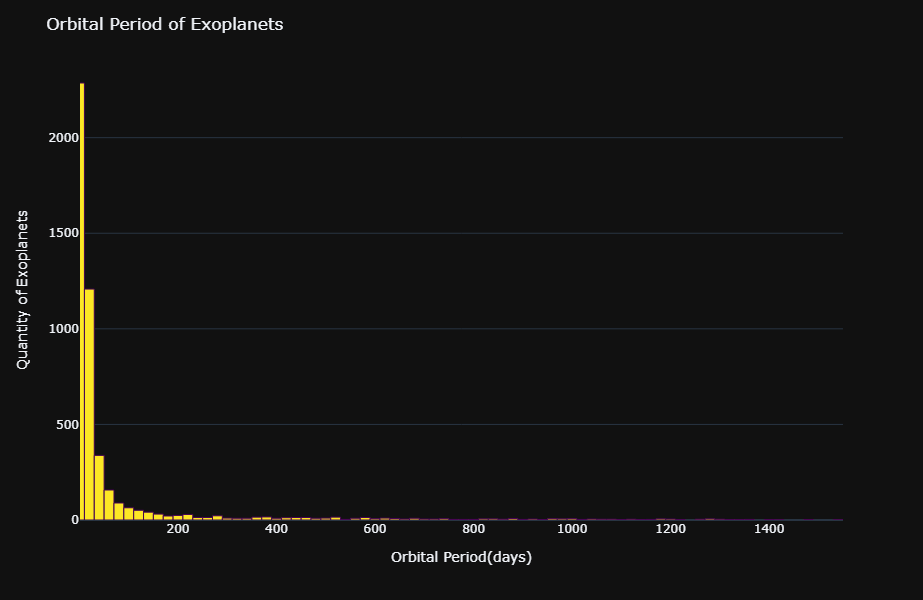

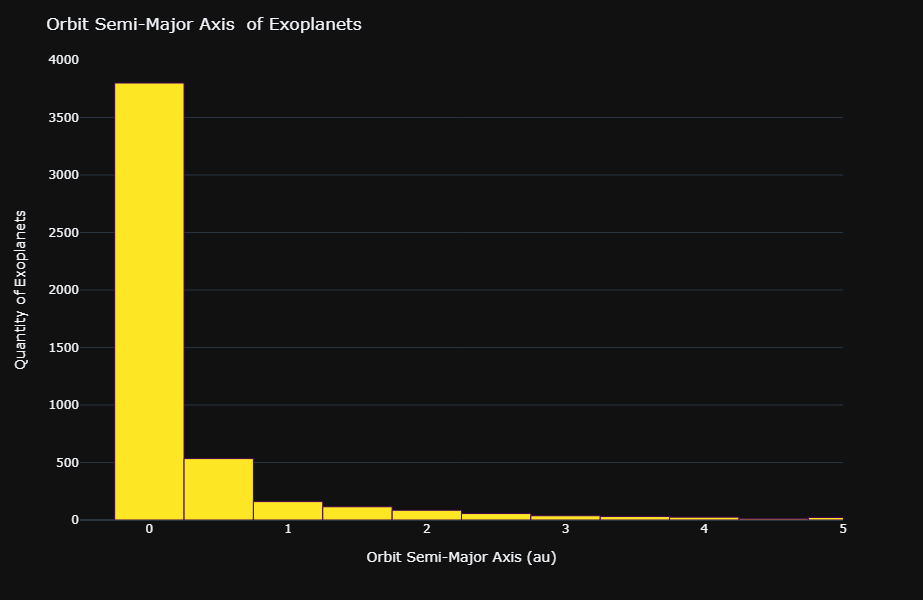

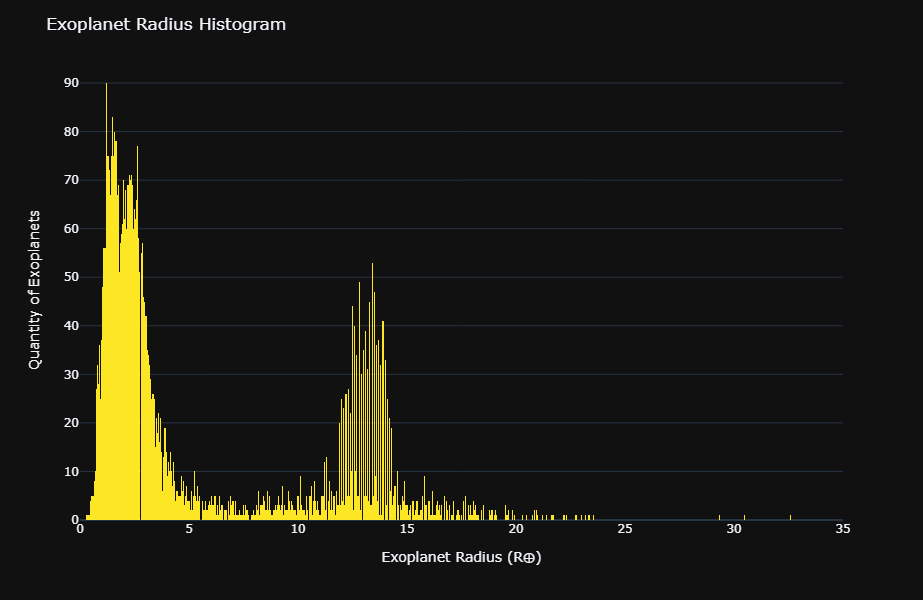

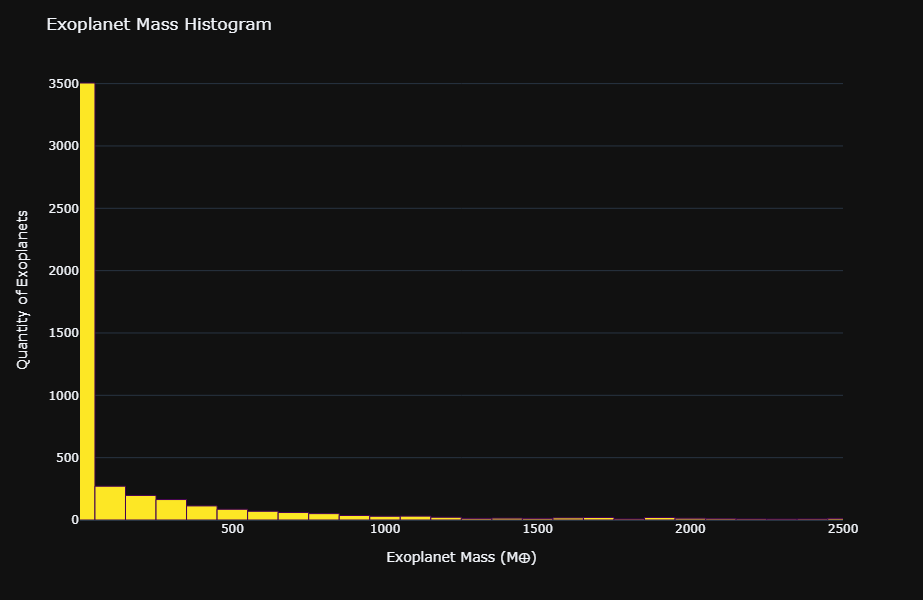

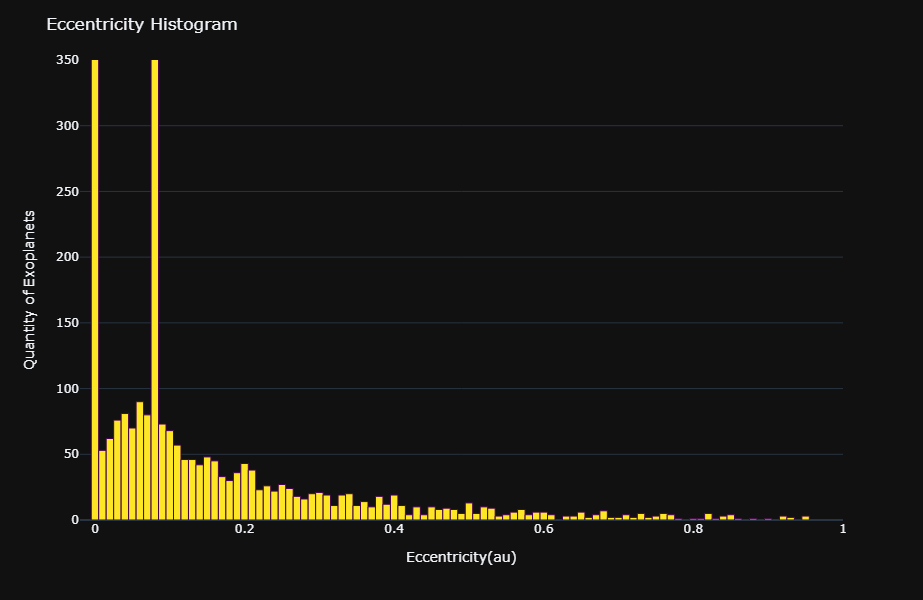

In [289]:
#  Orbital Period of Exoplanets Graphic 📊

fig = px.histogram(orb_period, x = orb_period.values, color_discrete_sequence=colors, nbins=100)
fig.update_traces(marker=dict(color=colors[0], line=dict(color=edgecolor[0], width=1)))
fig.update_layout(title='Orbital Period of Exoplanets', xaxis_title = 'Orbital Period(days)', yaxis_title ='Quantity of Exoplanets', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[1, 1550])  # Set the x-axis range from 1 to Earth orbital period.
fig.show()

#  Orbit Semi-Major Axis  of Exoplanets Graphic 📊

fig = px.histogram(exoplanet_features_df, x=exoplanet_features_df['pl_orbsmax'], color_discrete_sequence=colors, nbins=1000, histfunc='count')
fig.update_traces(marker=dict(color=colors[0], line=dict(color=edgecolor[0], width=1)))
fig.update_layout(title='Orbit Semi-Major Axis  of Exoplanets', xaxis_title= 'Orbit Semi-Major Axis (au)' , yaxis_title='Quantity of Exoplanets', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[-0.5, 5])  # Set the x-axis range from perfect 0º angle to 5º
fig.show()

# Exoplanet Radius Histogram Graphic 📊

fig = px.histogram(exoplanet_features_df, x=exoplanet_features_df['pl_rade'], color_discrete_sequence=colors, nbins=1000, histfunc='count')
fig.update_layout(title='Exoplanet Radius Histogram', xaxis_title= 'Exoplanet Radius (R⨁)', yaxis_title='Quantity of Exoplanets', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[0, 35])  # Set the x-axis range from 1 Earth measure unit to reach the maximun
fig.show()

# Exoplanet Mass Histogram Graphic 📊

fig = px.histogram(exoplanet_features_df, x=exoplanet_features_df['pl_bmasse'], color_discrete_sequence=colors, nbins=1000)
fig.update_traces(marker=dict(color=colors[0], line=dict(color=edgecolor[0], width=1)))
fig.update_layout(title='Exoplanet Mass Histogram', xaxis_title= 'Exoplanet Mass (M⨁)', yaxis_title='Quantity of Exoplanets', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[1, 2500])  # Set the x-axis range from 1 Earth unit to the median + Std. Desviation
fig.show()


# Exoplanet Eccentricity Graphic 📊

fig = px.histogram(exoplanet_features_df, x=exoplanet_features_df['pl_orbeccen'], color_discrete_sequence=colors, nbins=100)
fig.update_traces(marker=dict(color=colors[0], line=dict(color=edgecolor[0], width=1)))
fig.update_layout(title='Eccentricity Histogram', xaxis_title= 'Eccentricity(au)', yaxis_title='Quantity of Exoplanets ', template="plotly_dark", width=800, height=600)
fig.update_xaxes(range=[-0.02, 1])  # Set the x-axis range until 1, max eccentricity
fig.update_yaxes(range=[0, 350])
fig.show()



In [290]:
# Normality tests:

saphiro_tests (star_exoplanet_features_df)
kurtosis_tests (star_exoplanet_features_df)
skewed_tests (star_exoplanet_features_df)

The P-value for feature pl_orbper is: 0.0
The test results 0.0 indicate that the distribution of pl_orbper is significantly different from a normal distribution.

The P-value for feature pl_orbsmax is: 0.0
The test results 0.0 indicate that the distribution of pl_orbsmax is significantly different from a normal distribution.

The P-value for feature pl_rade is: 0.0
The test results 0.0 indicate that the distribution of pl_rade is significantly different from a normal distribution.

The P-value for feature pl_bmasse is: 0.0
The test results 0.0 indicate that the distribution of pl_bmasse is significantly different from a normal distribution.

The P-value for feature pl_orbeccen is: 0.0
The test results 0.0 indicate that the distribution of pl_orbeccen is significantly different from a normal distribution.

The P-value for feature st_rad is: 0.0
The test results 0.0 indicate that the distribution of st_rad is significantly different from a normal distribution.

The P-value for feature st

In [291]:
# Trying to reach Normality:

star_exoplanet_features_df2 = outlier_slayer(star_exoplanet_features_df)

In [292]:
saphiro_tests (star_exoplanet_features_df2)
kurtosis_tests (star_exoplanet_features_df2)
skewed_tests (star_exoplanet_features_df2)

The P-value for feature pl_orbper is: 1.5225065775935208e-39
The test results 1.5225065775935208e-39 indicate that the distribution of pl_orbper is significantly different from a normal distribution.

The P-value for feature pl_orbsmax is: 6.801861703688471e-30
The test results 6.801861703688471e-30 indicate that the distribution of pl_orbsmax is significantly different from a normal distribution.

The P-value for feature pl_rade is: 2.6572571333090804e-21
The test results 2.6572571333090804e-21 indicate that the distribution of pl_rade is significantly different from a normal distribution.

The P-value for feature pl_bmasse is: 1.3032968230382641e-27
The test results 1.3032968230382641e-27 indicate that the distribution of pl_bmasse is significantly different from a normal distribution.

The P-value for feature pl_orbeccen is: 0.0
The test results 0.0 indicate that the distribution of pl_orbeccen is significantly different from a normal distribution.

The P-value for feature st_rad is

📝 With the exception of pl_rade, which maintains low Kurtosis and Skewness values, the distributions studied are not close to normal.

## BIVARIATE ANALYSIS

###  Numerical Variables (Discrete) in flags_df

In [296]:
flag_columns = ['ttv_flag','rv_flag', 'ptv_flag', 'tran_flag', 'ast_flag']
flags_df = df2.filter(items=flag_columns).copy()


In [297]:
# Crosstab with System Type

crosstab_df = cross_tab_maker(df2["sy_snum"], flags_df)
crosstab_df


ttv_flag      rv_flag       ptv_flag    tran_flag       ast_flag    
               0    1       0     1        0  1         0     1        0   1
sy_snum                                                                     
1           4203  322    2875  1650     4524  1       876  3649     4444  81
2            376   27     113   290      403  0       154   249      390  13
3             53    5      16    42       58  0        22    36       55   3
4              2    0       0     2        2  0         1     1        2   0

📋  

Bivariate analysis refers to the analysis of the "flag" columns of the Exoplanet dataset. Most of them are related to the detection of anomalous behavior of the exoplanet. We seek to understand if this is due to the relationship with the type of system.  From Chi-square test and Cramer value:

Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 


![Stellar Flags](./images/Flags_1.png)

![Stellar Flags](./images/Flags_2.png)

In [301]:
categorical_rel_chi_cram_tests(crosstab_df, flag_columns)

Chi-square (χ²) test for ttv_flag is 0.9284572376997898
Cramers V test for ttv_flag is 0.009560802511844768

Chi-square (χ²) test for rv_flag is 3.0248572578624306e-48
Cramers V test for rv_flag is 0.21182111221399072

Chi-square (χ²) test for ptv_flag is 0.9915550273824125
Cramers V test for ptv_flag is 0.004529617392835326

Chi-square (χ²) test for tran_flag is 2.2210077762133065e-19
Cramers V test for tran_flag is 0.13430454252193536

Chi-square (χ²) test for ast_flag is 0.06449521920693904
Cramers V test for ast_flag is 0.038110603330079214



**FLAG ANALYSIS**

*H0: Reject*

**Transit Timing Variations** (detected and studied) are totally independent with the type os star system.

*H0: Accept*

**Radial Velocity Variations**  detected are significat relate with the type os star system. With a important 0.2118 dependence between this two variables. Complex star systems affect the radial velocity of  exoplanets hosted.

*H0: Reject*

**Pulsation Variations**  can only be detected if the star's pulsations are ordinarily extremely regular. Those aren´t related with the type of system.

*H0: Accept*

**Transists Planets detected** are related with the type of star system. Nevertheless the strong of this assocciation isn´t too high. A transit planet detected is related with it owns a star system, but no "select type"

*H0: Reject / almost acept*

**Astronomical Variations detected** We have to reject the hypothesis that there is a relationship between the astronomical variations of the planet and the star it orbits. This test is rejected by a very small margin.

 ### Numerical Variables (Continuos), about Stars and Planets.

In [304]:
# Correlation between Star Features

corr_pea = stars_df["st_rad"].corr(stars_df["st_mass"])
corr_sp = stars_df["st_rad"].corr(stars_df["st_mass"], method="spearman")

print(f'The Pearson Correlation between star radius and mass is {corr_pea.round(2)}.')
print(f'The Spearman Correlation between star radius and mass is {corr_sp.round(2)}.\n')

# Correlation between Planetary and Star Features

corr_rad_exo = exoplanet_features_df.corrwith(stars_df["st_rad"])
corr_sp_rad_exo = exoplanet_features_df.corrwith(stars_df["st_rad"], method="spearman")
corr_mass_exo = exoplanet_features_df.corrwith(stars_df["st_mass"])
corr_sp_mass_exo = exoplanet_features_df.corrwith(stars_df["st_mass"], method="spearman")

print(f'The Pearson Correlations between star radius and planet features are:\n{corr_rad_exo.sort_values(ascending=False)}.\2')
print(f'The Spearman Correlation between star radius and planet features are:\n{corr_sp_rad_exo.sort_values(ascending=False)}.\2')
print(f'The Pearson Correlations between star mass and planet features are:\n{corr_mass_exo.sort_values(ascending=False)}.\2')
print(f'The Spearman Correlation between star mass and planet features are:\n{corr_sp_mass_exo.sort_values(ascending=False)}.\2')

The Pearson Correlation between star radius and mass is 0.51.
The Spearman Correlation between star radius and mass is 0.93.

The Pearson Correlations between star radius and planet features are:
pl_rade        0.215223
pl_bmasse      0.155334
pl_orbeccen    0.116703
pl_orbsmax     0.029046
pl_orbper     -0.004040
dtype: float64.
The Spearman Correlation between star radius and planet features are:
pl_rade        0.412211
pl_bmasse      0.391323
pl_orbsmax     0.269604
pl_orbper      0.186157
pl_orbeccen    0.091202
dtype: float64.
The Pearson Correlations between star mass and planet features are:
pl_rade        0.364657
pl_bmasse      0.150274
pl_orbeccen    0.104209
pl_orbsmax     0.006324
pl_orbper     -0.022897
dtype: float64.
The Spearman Correlation between star mass and planet features are:
pl_rade        0.376852
pl_bmasse      0.358263
pl_orbsmax     0.231620
pl_orbper      0.146066
pl_orbeccen    0.049400
dtype: float64.


**Star Mass and Star Rade**

When analyzing the correlations between the radius of the star and its mass, we see that they are highly positively correlated, however this correlation is hardly linear. Higher mass implies higher radius but not necessarily in a directly proportional relationship.

**Star Features  and Planet Features**

The variables of the planet related to the orbit are hardly related to the mass and radius of the star, and the little influence of these on the characteristics of the planet is a relational behavior, rather monotonic, is given between the mass and radius of the star with the characteristics of the planet. 

We can consider practically independent the variables related to the orbit and we can see a positive non-significant relation between the mass of the planet and the radius of the planet.

In [306]:
# Correlation between Planetary  Features

corr_df = round(exoplanet_features_df.corr(),2)
corr_sp_df = round(exoplanet_features_df.corr(method="spearman"),2)

corr_st_system_sp_df = round(star_exoplanet_features_df.corr(method="spearman"),2)
corr_st_system_df = round(star_exoplanet_features_df.corr(),2)

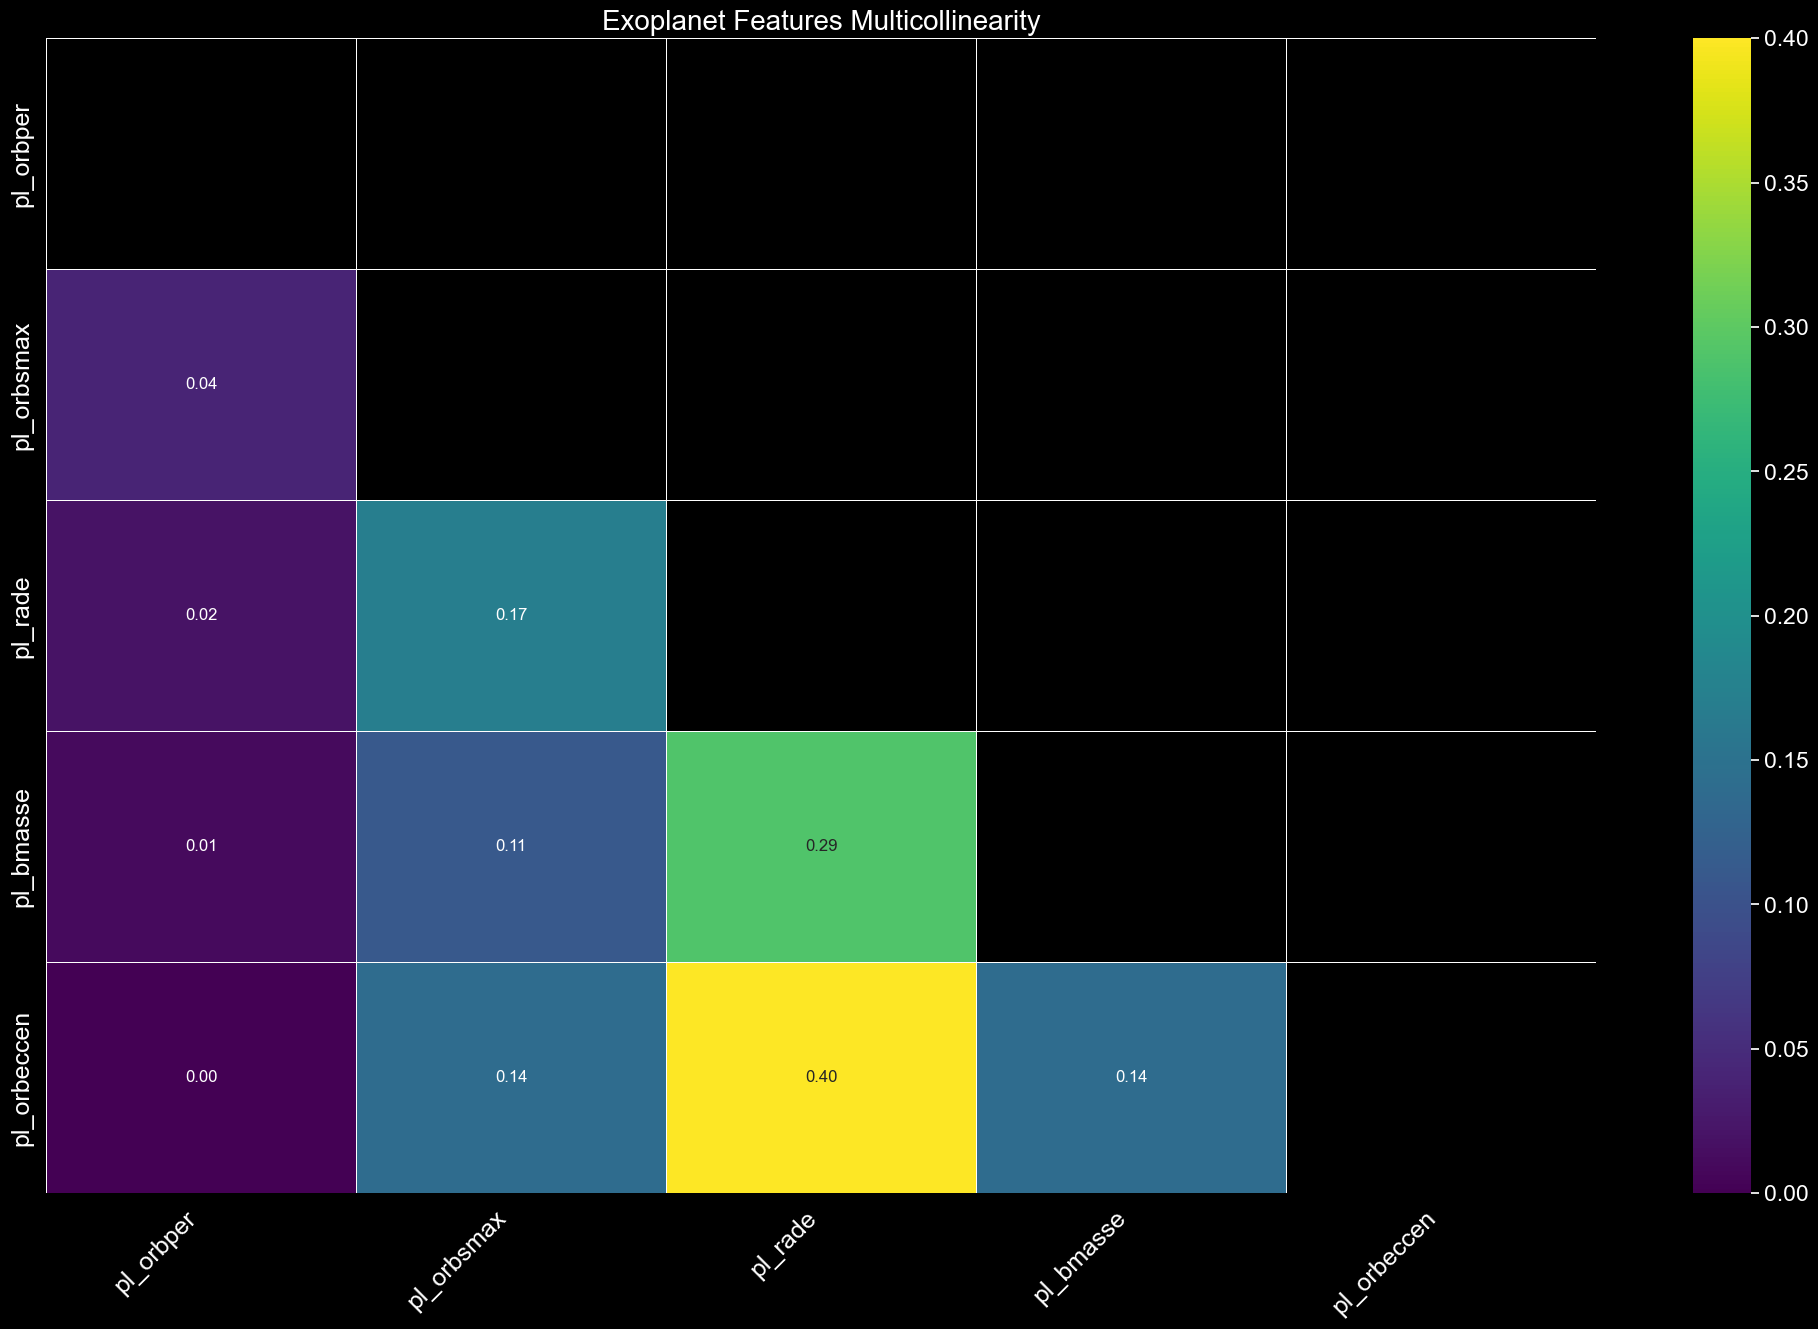

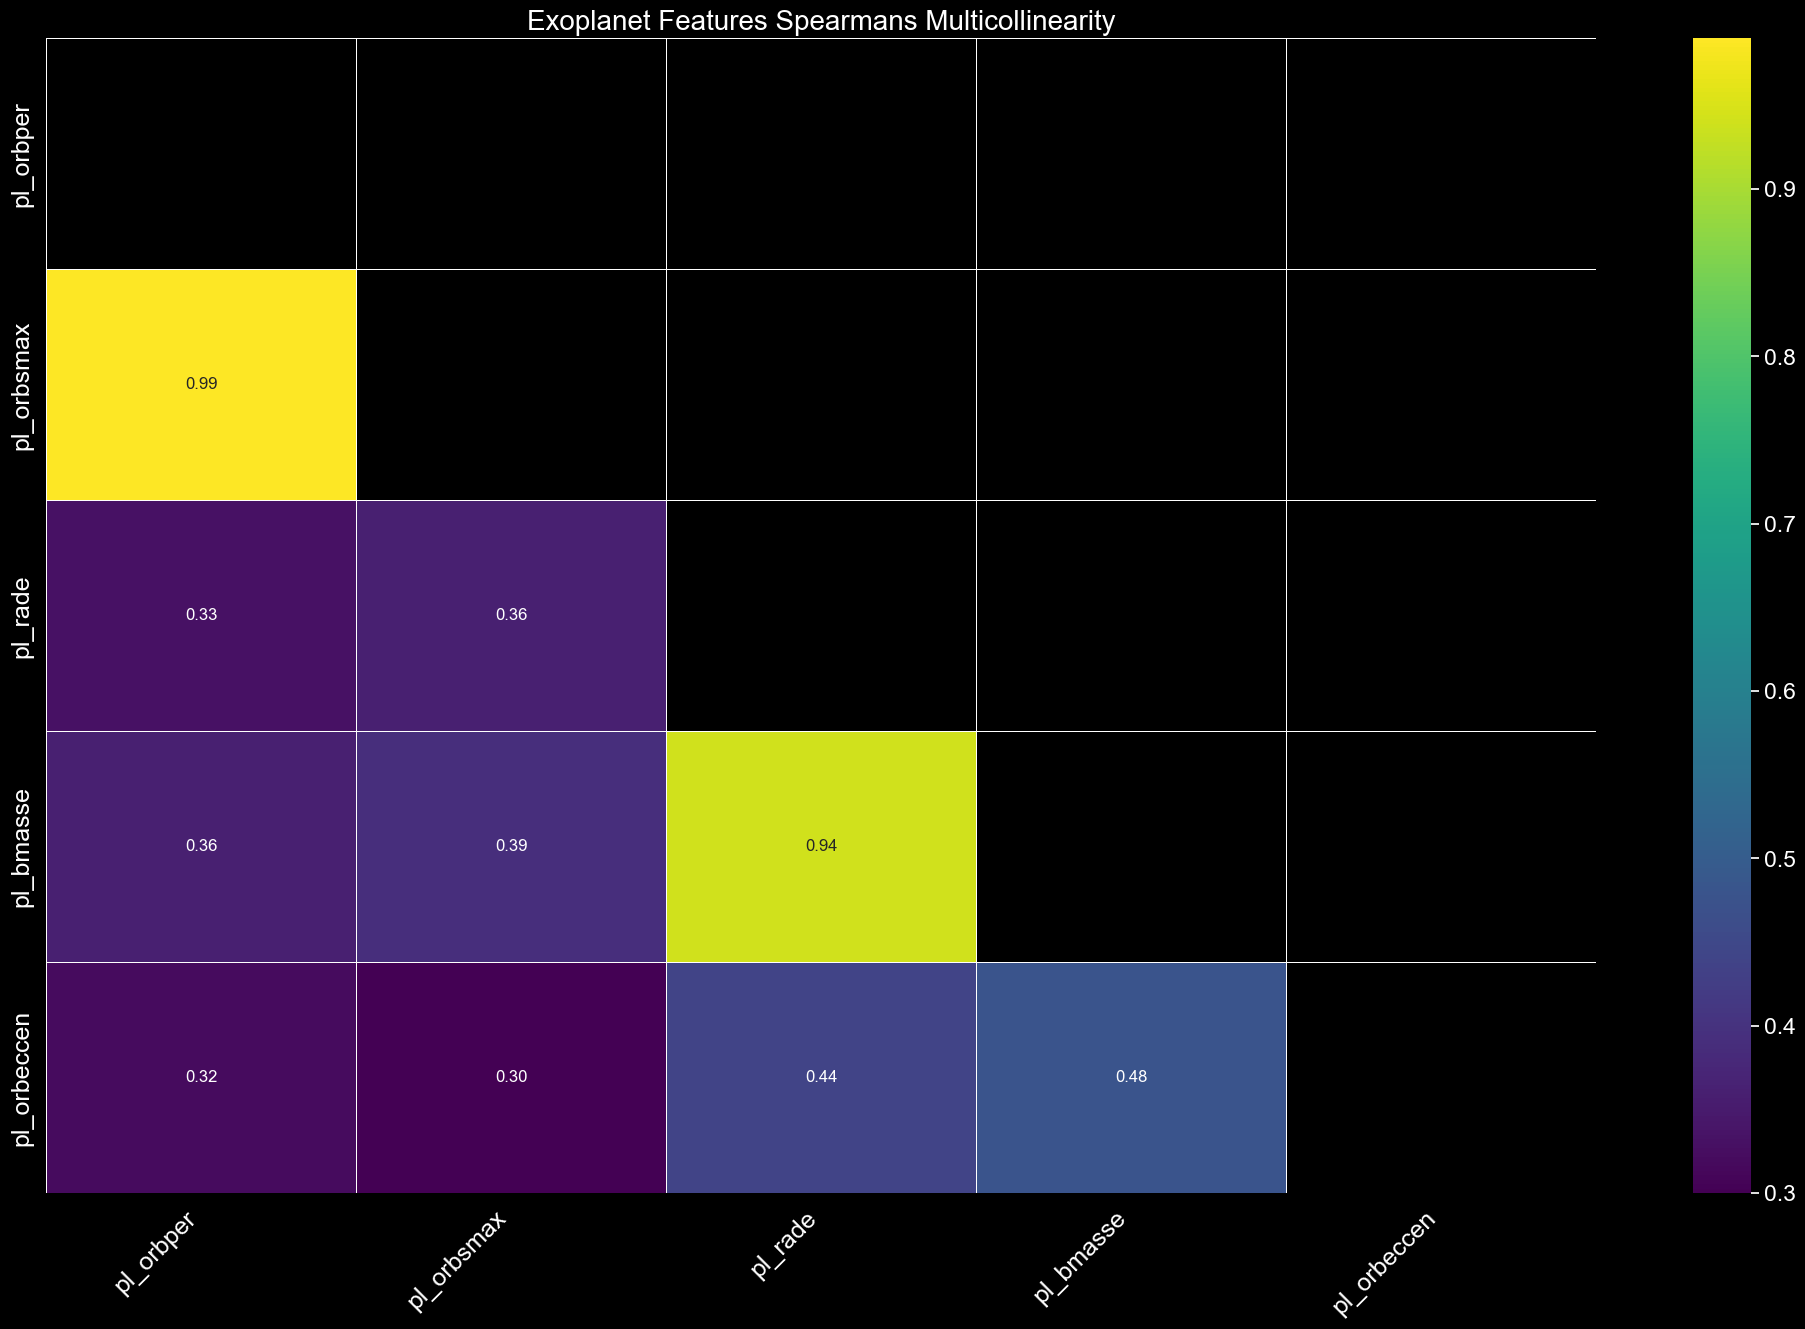

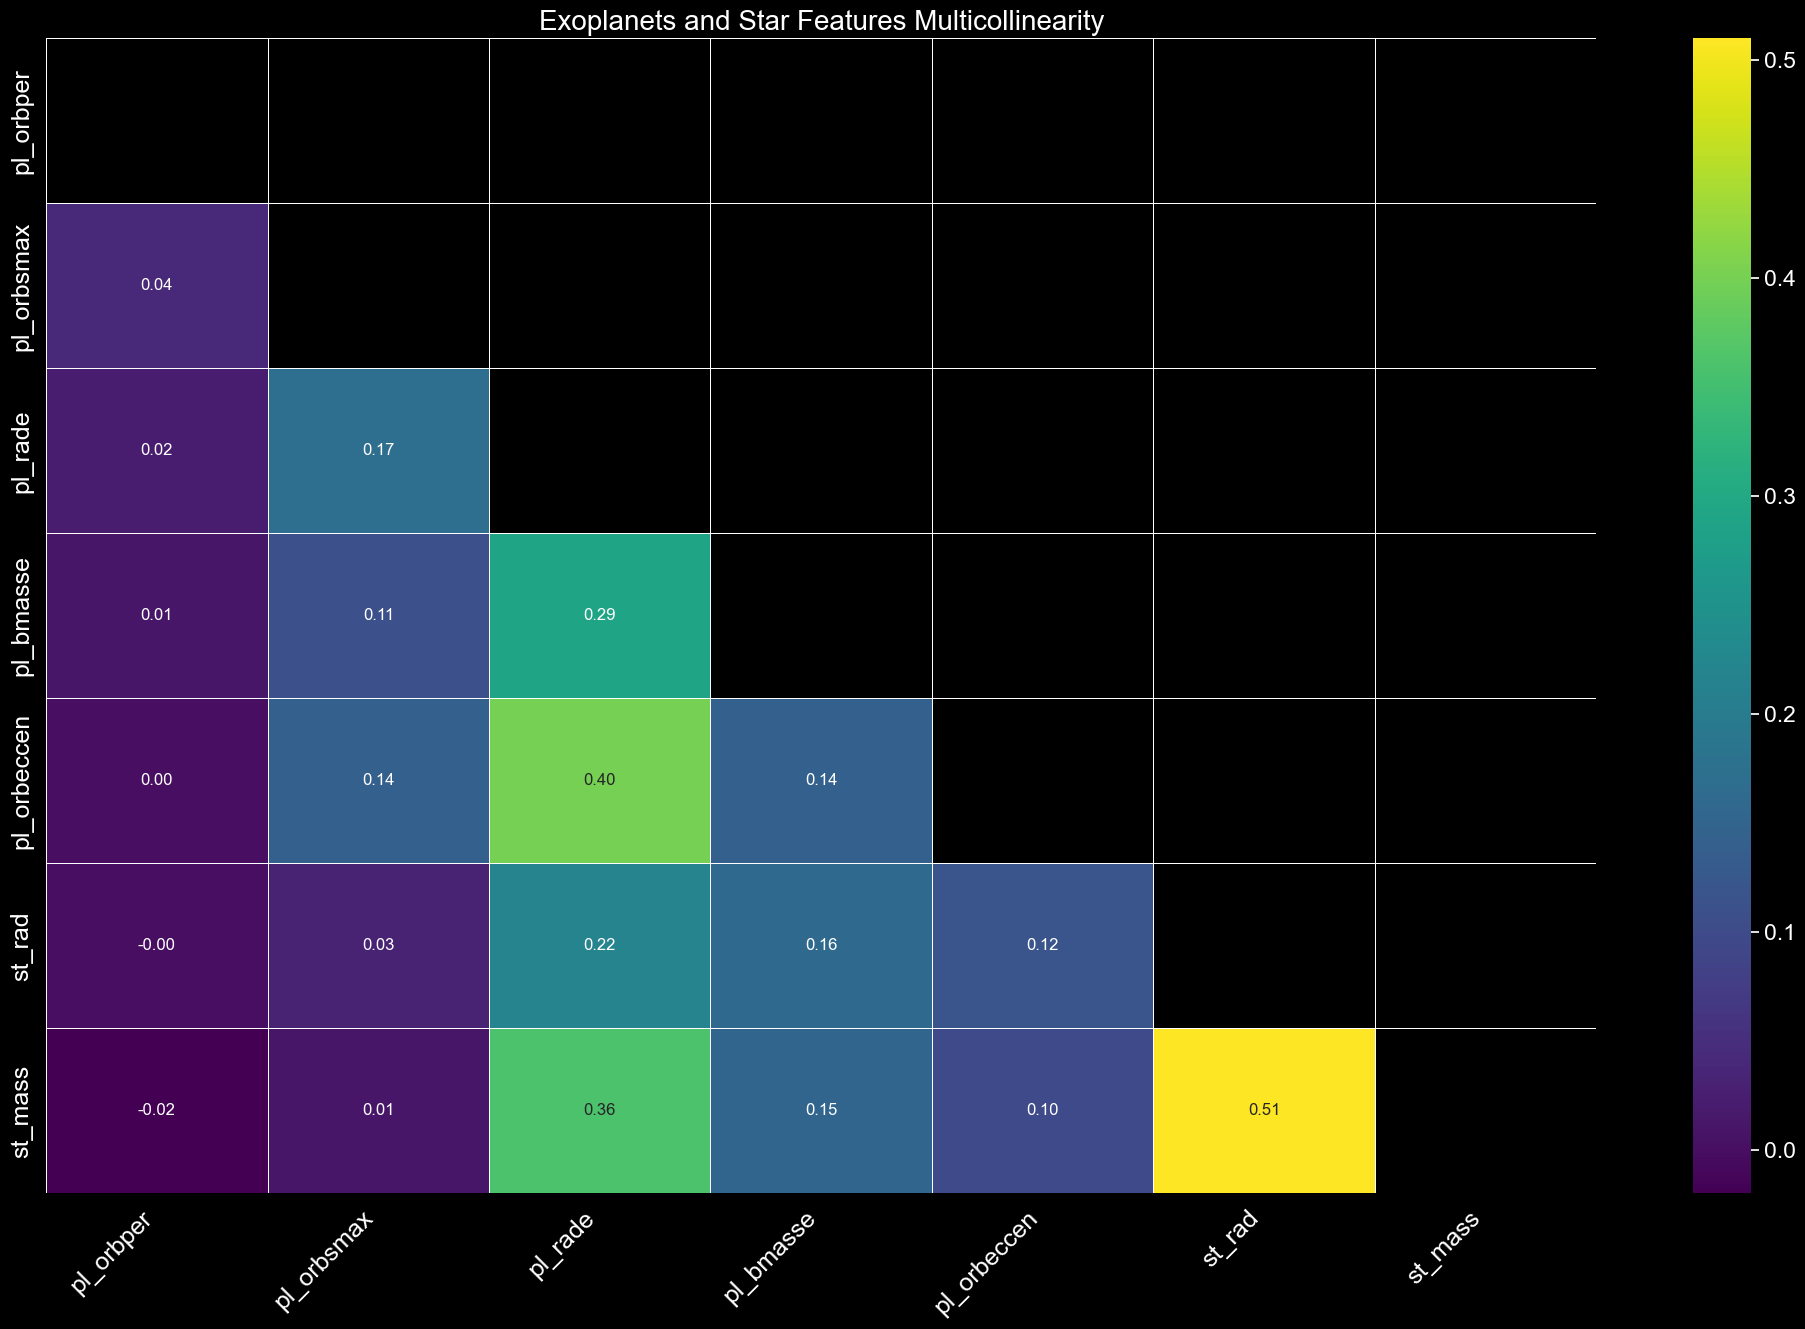

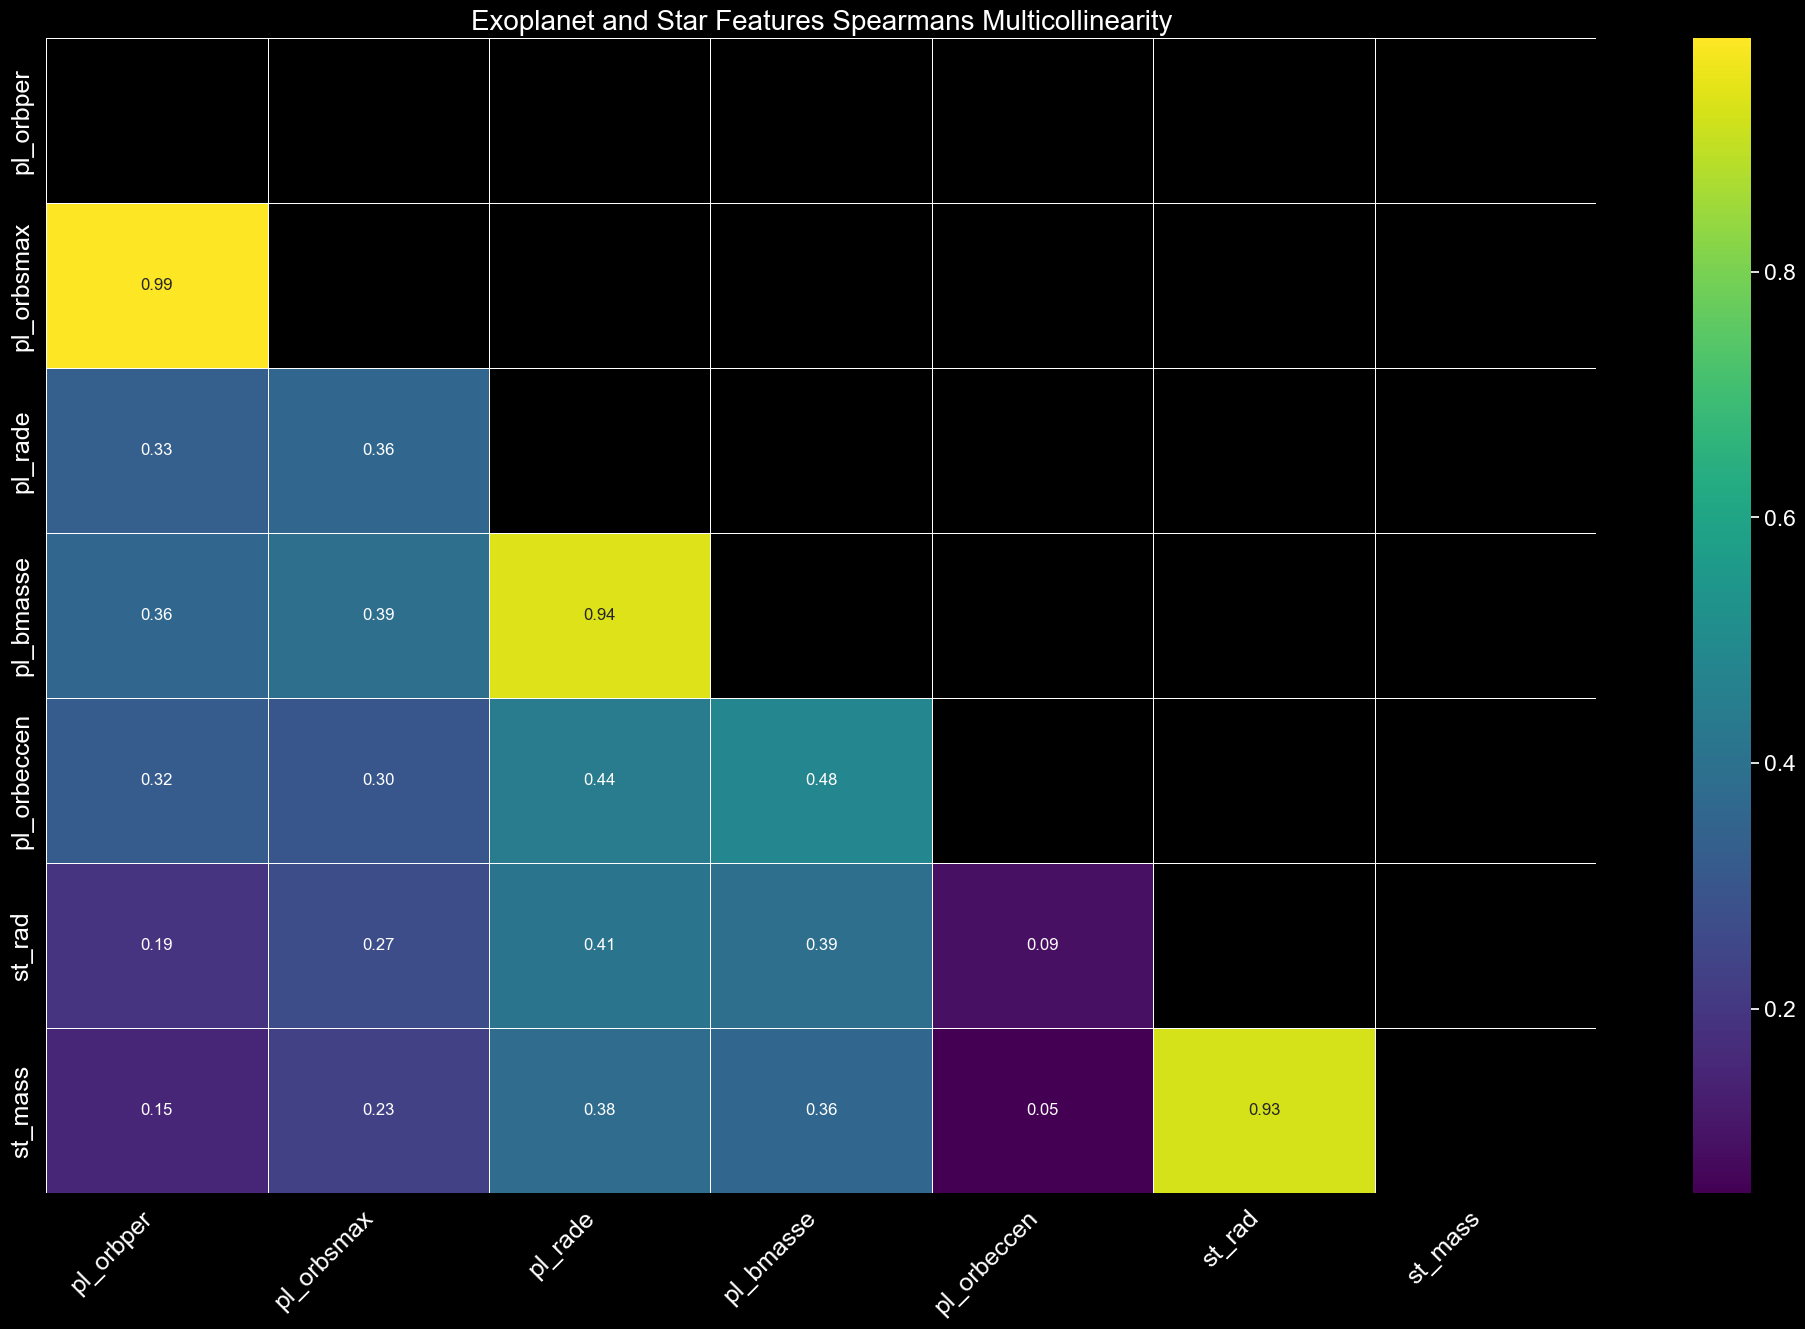

In [307]:
#Correlation Matrix-Heatmap Plot Exoplanet Features 📊

mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Add Black color grid
sns.set_style("dark", {"axes.facecolor": "black", "grid.color": "black"})

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr_df, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="viridis", fmt=".2f", ax=ax) # round to 2 decimal places

# Añade white color to the ticklabels
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18, color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18, color="white")
ax.set_title("Exoplanet Features Multicollinearity", fontsize=20, color="white")

# Legend colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.ax.yaxis.label.set_color('white')

# Background color change to black  📍  
f.set_facecolor('black')
plt.show()


# Spearman Correlation Matrix-Heatmap Plot Exoplanet Features 📊

mask = np.zeros_like(corr_sp_df)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Add Black color grid
sns.set_style("dark", {"axes.facecolor": "black", "grid.color": "black"})

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr_sp_df, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="viridis", fmt=".2f", ax=ax) # round to 2 decimal places

# Añade white color to the ticklabels
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18, color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18, color="white")
ax.set_title("Exoplanet Features Spearmans Multicollinearity", fontsize=20, color="white")

# Legend colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.ax.yaxis.label.set_color('white')

# Background color change to black  📍  
f.set_facecolor('black')
plt.show()

#Correlation Matrix-Heatmap Plot Exoplanet and Star Features 📊

mask = np.zeros_like(corr_st_system_df) 
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Add Black color grid
sns.set_style("dark", {"axes.facecolor": "black", "grid.color": "black"})

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr_st_system_df, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="viridis", fmt=".2f", ax=ax) # round to 2 decimal places

# Añade white color to the ticklabels
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18, color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18, color="white")
ax.set_title("Exoplanets and Star Features Multicollinearity", fontsize=20, color="white")

# Legend colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.ax.yaxis.label.set_color('white')

# Background color change to black  📍  
f.set_facecolor('black')
plt.show()


# Spearman Correlation Matrix-Heatmap Plot Exoplanet and Star Features 📊

mask = np.zeros_like(corr_st_system_sp_df)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Add Black color grid
sns.set_style("dark", {"axes.facecolor": "black", "grid.color": "black"})

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr_st_system_sp_df, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="viridis", fmt=".2f", ax=ax) # round to 2 decimal places

# Añade white color to the ticklabels
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18, color="white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18, color="white")
ax.set_title("Exoplanet and Star Features Spearmans Multicollinearity", fontsize=20, color="white")

# Legend colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.ax.yaxis.label.set_color('white')

# Background color change to black  📍  
f.set_facecolor('black')
plt.show()

### Categoricals vs Numericals

**Star System suitability testing to sustain an habitable zone**

In [310]:
print(f'Median values of System Type is {df2["sy_snum"].median()}')
print(f'Median values of Star Radius is {df2["sy_snum"].median()}')
print(f'Median values of Star Mass Type is {df2["sy_snum"].median()}\n')
df2[(star_system)].describe().round(2).T

Median values of System Type is 1.0
Median values of Star Radius is 1.0
Median values of Star Mass Type is 1.0



count  mean   std   min   25%   50%   75%     max
sy_snum  4988.0  1.11  0.35  1.00  1.00  1.00  1.00    4.00
st_rad   4988.0  1.58  4.34  0.01  0.78  0.96  1.25  109.46
st_mass  4988.0  0.97  0.40  0.01  0.81  0.96  1.10   10.94

In [311]:
kruskal_df = pd.concat([stars_df,contrast_df["st_spectype"]], axis=1)

In [312]:
FGK_mass_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"].isin(["F", "G", "K"]))]["st_mass"]
M_mass_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"] == "M")]["st_mass"]
No_spect_mass_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"] == "No spect")]["st_mass"]


In [313]:
FGK_rad_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"].isin(["F", "G", "K"]))]["st_rad"]
M_rad_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"] == "M")]["st_rad"]
No_spect_one_star_df = kruskal_df[(kruskal_df["sy_snum"] == 1) & (kruskal_df["st_spectype"] == "No spect")]["st_rad"]

In [314]:
kruskal_tests (FGK_mass_one_star_df, No_spect_mass_one_star_df)

The P-value for this groups is: 1.1794210432253225e-17
We reject the null hypothesis


In [315]:
kruskal_tests (FGK_mass_one_star_df, No_spect_mass_one_star_df)

The P-value for this groups is: 1.1794210432253225e-17
We reject the null hypothesis


In [316]:
kruskal_tests (M_mass_one_star_df, FGK_mass_one_star_df)

The P-value for this groups is: 5.080852783081248e-158
We reject the null hypothesis


In [317]:
kruskal_tests (FGK_rad_one_star_df, No_spect_one_star_df)

The P-value for this groups is: 4.508364663486974e-33
We reject the null hypothesis


In [318]:
kruskal_tests (M_rad_one_star_df, No_spect_one_star_df)

The P-value for this groups is: 8.133270503473071e-170
We reject the null hypothesis


In [319]:
kruskal_tests (M_rad_one_star_df, FGK_rad_one_star_df)

The P-value for this groups is: 4.0260426183362523e-159
We reject the null hypothesis


# FEATURE ENGENIEERING

## DATA FILTERING: CANDIDATES CONSTRUCTION

In [322]:
star_exoplanet_features_df2 = star_exoplanet_features_df.copy()
contrast_df2 = contrast_df["st_spectype"].copy()

important_flags = ["ttv_flag","rv_flag","tran_flag"]
flags_df2 = flags_df.filter(important_flags).copy()


In [323]:
# Star Features Engenieering.

feat_eng_df = pd.concat([star_exoplanet_features_df2, df2["sy_snum"],], axis = 1) # Unitarian systems
feat_eng_df2 = feat_eng_df[feat_eng_df["sy_snum"]==1].copy()

feat_eng_df3 = feat_eng_df2[(feat_eng_df2["st_mass"] > 0.1) & (feat_eng_df2["st_mass"] <= 1.10)].copy() # Mass between minimum of Dwarf Stars and Max recognized in HZ
feat_eng_df4 =feat_eng_df3[(feat_eng_df2["st_rad"] <= 1.4)].copy()

In [324]:
# Planet Features Engenieering.

feat_eng_df4 = feat_eng_df4.drop("pl_orbper", axis=1) #Extreme variability
feat_eng_df5 = feat_eng_df4[(feat_eng_df4["pl_rade"] >= 0.5) & (feat_eng_df4["pl_rade"] <= 2.6)].copy() # 2.6 maximum radius of minineptunes (near median of observations).Earth type with radius between 0.5-2.0 R⊕.
feat_eng_df6 = feat_eng_df5[(feat_eng_df5["pl_orbsmax"] >= 0.01) & (feat_eng_df5["pl_orbsmax"] <= 1)].copy() # HZ frame of AU values.
feat_eng_df7 = feat_eng_df6[(feat_eng_df6["pl_bmasse"] >= 0.8) & (feat_eng_df6["pl_bmasse"] <= 10)].copy() #Earth type on those exoplanets with masses between 0.8-1.9 M⊕. Maximum of 12 M⊕ recognized to minineptunes, 10.34 M⊕ Near to the mean

In [325]:
# Solution One: No Flag Candidates
no_flag_exoplanets_df = feat_eng_df7[(feat_eng_df7["pl_orbeccen"] <= 0.6)].copy()
no_flag_exoplanets_df

pl_orbsmax  pl_rade  pl_bmasse  pl_orbeccen  st_rad  \
pl_name                                                                  
61 Vir b             0.050201    2.110    5.10000        0.120    0.96   
CD Cet b             0.018500    1.820    3.95000        0.075    0.17   
CoRoT-7 b            0.017016    1.681    4.07661        0.000    0.83   
EPIC 201170410.02    0.034900    1.047    1.15000        0.000    0.28   
EPIC 201841433 b     0.035000    1.040    1.12000        0.075    0.63   
...                       ...      ...        ...          ...     ...   
pi Men c             0.069000    2.060    3.63000        0.077    1.19   
rho CrB e            0.106100    1.770    3.79000        0.126    1.35   
tau Cet e            0.538000    1.810    3.93000        0.180    0.83   
tau Cet g            0.133000    1.180    1.75000        0.060    0.83   
tau Cet h            0.243000    1.190    1.83000        0.230    0.83   

                   st_mass  sy_snum  
pl_name                              
61 Vir b              0.94        1  
CD Cet b              0.16        1  
CoRoT-7 b             0.82        1  
EPIC 201170410.02     0.29        1  
EPIC 201841433 b      0.80        1  
...                    ...      ...  
pi Men c              1.10        1  
rho CrB e             0.95        1  
tau Cet e             0.78        1  
tau Cet g             0.78        1  
tau Cet h             0.78        1  

[1659 rows x 7 columns]

In [326]:
# Flag Features Engeeniering

feat_eng_df8 = pd.merge(no_flag_exoplanets_df,flags_df2, left_index=True, right_index=True, how='inner')

In [327]:
# Solution Two:  Flag Candidates

flag_exoplanets_df = feat_eng_df8[(feat_eng_df8["tran_flag"] == 1)].copy() # 0 value it means that planet transit hosted by several stars or no hosted by one star
flag_exoplanets_df

pl_orbsmax  pl_rade  pl_bmasse  pl_orbeccen  st_rad  \
pl_name                                                                  
CoRoT-7 b            0.017016    1.681    4.07661        0.000    0.83   
EPIC 201170410.02    0.034900    1.047    1.15000        0.000    0.28   
EPIC 201841433 b     0.035000    1.040    1.12000        0.075    0.63   
EPIC 211822797 b     0.119500    1.920    4.35000        0.060    0.58   
EPIC 212737443 b     0.098000    2.586    7.20000        0.200    0.67   
...                       ...      ...        ...          ...     ...   
TOI-836 c            0.075000    2.587    9.60000        0.078    0.67   
WASP-47 e            0.016730    1.808    6.77000        0.030    1.14   
Wolf 327 b           0.010000    1.240    2.53000        0.000    0.41   
Wolf 503 b           0.057120    2.043    6.27000        0.409    0.69   
pi Men c             0.069000    2.060    3.63000        0.077    1.19   

                   st_mass  sy_snum  ttv_flag  rv_flag  tran_flag  
pl_name                                                            
CoRoT-7 b             0.82        1         0        1          1  
EPIC 201170410.02     0.29        1         0        0          1  
EPIC 201841433 b      0.80        1         0        0          1  
EPIC 211822797 b      0.62        1         0        0          1  
EPIC 212737443 b      0.69        1         0        0          1  
...                    ...      ...       ...      ...        ...  
TOI-836 c             0.68        1         1        1          1  
WASP-47 e             1.04        1         0        1          1  
Wolf 327 b            0.41        1         0        1          1  
Wolf 503 b            0.69        1         0        1          1  
pi Men c              1.10        1         0        1          1  

[1560 rows x 10 columns]

In [328]:
# Contrast with Solutions

contrast_no_flag_exo_planets_df = pd.merge(no_flag_exoplanets_df,contrast_df2, left_index=True, right_index=True, how='inner')
contrast_flag_exoplanets_df = pd.merge(flag_exoplanets_df,contrast_df2, left_index=True, right_index=True, how='inner')

## DATA SCALING: LOOKING FOR NORMALIZATION.

In [330]:
# Box-Cox Transformation

lambda_value = 1.5


In [331]:
box_cox_exoplanets_df = no_flag_exoplanets_df.apply(lambda x: st.boxcox(x, lmbda=lambda_value), axis=0)
box_cox_fl_exoplanets_df = flag_exoplanets_df.apply(lambda x: st.boxcox(x, lmbda=lambda_value), axis=0)

In [332]:
saphiro_tests (box_cox_exoplanets_df)
kurtosis_tests (box_cox_exoplanets_df)
skewed_tests (box_cox_exoplanets_df)

The P-value for feature pl_orbsmax is: 0.0
The test results 0.0 indicate that the distribution of pl_orbsmax is significantly different from a normal distribution.

The P-value for feature pl_rade is: 1.3580552241209462e-22
The test results 1.3580552241209462e-22 indicate that the distribution of pl_rade is significantly different from a normal distribution.

The P-value for feature pl_bmasse is: 4.9198441260171745e-26
The test results 4.9198441260171745e-26 indicate that the distribution of pl_bmasse is significantly different from a normal distribution.

The P-value for feature pl_orbeccen is: 0.0
The test results 0.0 indicate that the distribution of pl_orbeccen is significantly different from a normal distribution.

The P-value for feature st_rad is: 1.5132825865293853e-05
The test results 1.5132825865293853e-05 indicate that the distribution of st_rad is significantly different from a normal distribution.

The P-value for feature st_mass is: 7.182715803834821e-24
The test results 

In [333]:
saphiro_tests (box_cox_fl_exoplanets_df)
kurtosis_tests (box_cox_fl_exoplanets_df)
skewed_tests (box_cox_fl_exoplanets_df)

The P-value for feature pl_orbsmax is: 0.0
The test results 0.0 indicate that the distribution of pl_orbsmax is significantly different from a normal distribution.

The P-value for feature pl_rade is: 1.1717131516622803e-21
The test results 1.1717131516622803e-21 indicate that the distribution of pl_rade is significantly different from a normal distribution.

The P-value for feature pl_bmasse is: 1.520618511443887e-25
The test results 1.520618511443887e-25 indicate that the distribution of pl_bmasse is significantly different from a normal distribution.

The P-value for feature pl_orbeccen is: 0.0
The test results 0.0 indicate that the distribution of pl_orbeccen is significantly different from a normal distribution.

The P-value for feature st_rad is: 3.0305252948892303e-05
The test results 3.0305252948892303e-05 indicate that the distribution of st_rad is significantly different from a normal distribution.

The P-value for feature st_mass is: 7.973143639249091e-22
The test results 7.

Mejores los buenos, peores los malos en df con flags

# CLUSTERING MODEL

**No flag model - K2-18 b**

In [337]:
# Targeting

X = box_cox_exoplanets_df
y = box_cox_exoplanets_df.loc['K2-18 b']


In [338]:
# Pop "st_spectype"

st_spectype = contrast_no_flag_exo_planets_df.pop("st_spectype")

# Mantain pl_name as column.

X = X.reset_index()
pl_name = X.pop("pl_name")

In [339]:
#Scalate to Robust Data:

scaler = preprocessing.RobustScaler()

X_scaled = scaler.fit_transform(X)
#rb_fl_exoplanets = scaler.fit_transform(gaia_df)

X_scaler_df = pd.DataFrame(X_scaled, columns=no_flag_exoplanets_df.columns)
#rb_fl_exoplanets_df = pd.DataFrame(rb_fl_exoplanets, columns=flag_exoplanets_df.columns)


In [340]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [341]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.721


In [342]:
inertias = []
range_of_clusters = range(1, 11)

for k in range_of_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

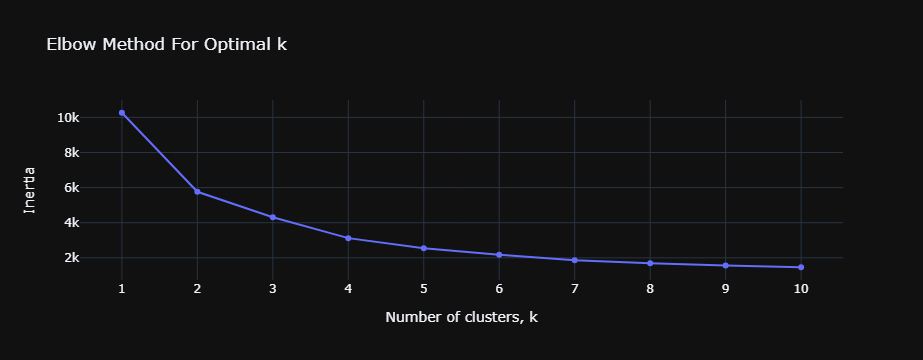

In [343]:
# Elbow Method for Optimal Clustering

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range_of_clusters), y=inertias, mode='lines+markers', name='Inertia'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis_title='Number of clusters, k',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='array', tickvals=list(range_of_clusters)),
                  template='plotly_dark')  # Dark background
fig.show()

# DATA VISUALIZATION

In [345]:
X_scaler_df = pd.DataFrame(X_scaled, columns=no_flag_exoplanets_df.columns)
X_scaler_df["cluster"] = kmeans.labels_
X_scaler_df.insert(loc=0, column="pl_name", value=pl_name)
X_scaler_df.insert(loc=8, column="st_spectype", value=st_spectype)

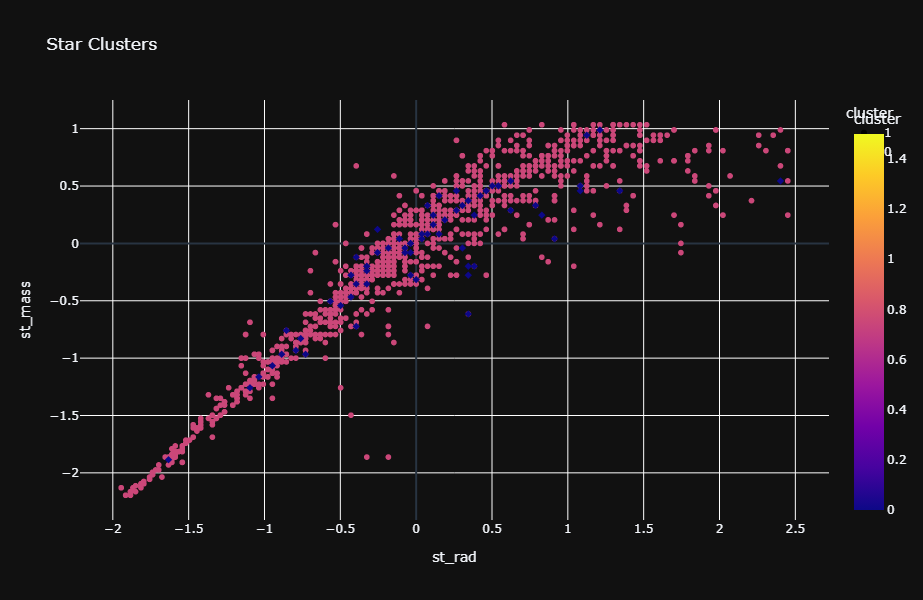

In [346]:
# Assuming X_scaler_df is already defined and contains 'st_mass', 'st_spectype', and 'cluster' columns



fig = px.scatter(X_scaler_df, x='st_rad', y='st_mass', color='cluster', symbol='cluster', size_max=5, 
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 title='Star Clusters')

fig.update_layout(
    
    template='plotly_dark',  # Dark background
    xaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on x-axis
    yaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on y-axis
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

fig.show()


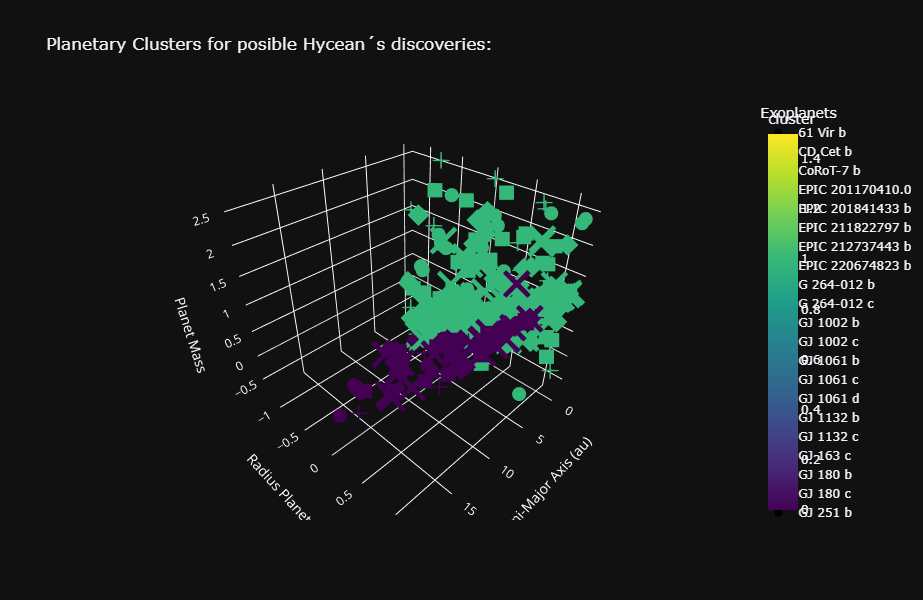

In [347]:
# Planetary Clusters for  posible Hycean´s discoveries: 

fig = px.scatter_3d(X_scaler_df, x='pl_orbsmax', y='pl_rade', z='pl_bmasse', color='cluster', symbol='pl_name', size_max=3,
                    color_continuous_scale ='viridis', 
                    #color_continuous_midpoint = "Red" 
                    labels={'pl_orbsmax': 'Semi-Major Axis (au)', 'pl_rade': 'Radius Planet', 'pl_bmasse': 'Planet Mass', 'pl_name': 'Name'},
                    title='Planetary Clusters for posible Hycean´s discoveries:')

fig.update_layout(
    legend_title='Exoplanets',
    template='plotly_dark',  # Dark background
    scene = dict(
        xaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on x-axis
        yaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on y-axis
        zaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on z-axis
    ),
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

fig.show()


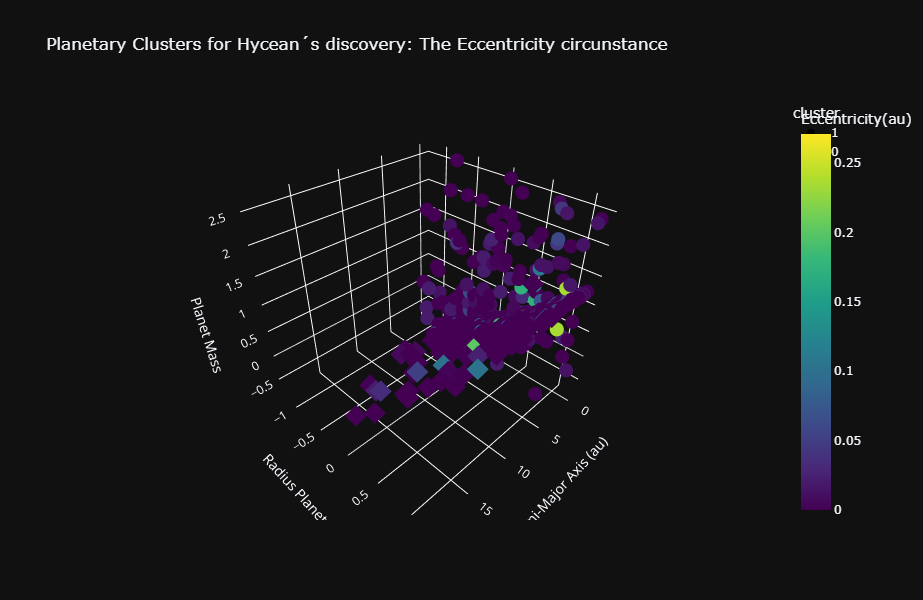

In [433]:
# Planetary Clusters for Hycean´s discovery: The Eccentricity circunstance.

fig = px.scatter_3d(X_scaler_df, x='pl_orbsmax', y='pl_rade', z='pl_bmasse', color='pl_orbeccen', symbol='cluster', size_max=5,
                    color_continuous_scale='viridis',
                    labels={'pl_orbsmax': 'Semi-Major Axis (au)', 'pl_rade': 'Radius Planet', 'pl_bmasse': 'Planet Mass', "pl_orbeccen":"Eccentricity(au)",'pl_name':'Name'},
                    title='Planetary Clusters for Hycean´s discovery: The Eccentricity circunstance')

fig.update_layout(
    template='plotly_dark',  # Dark background
    scene = dict(
        xaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on x-axis
        yaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on y-axis
        zaxis=dict(showgrid=True, gridcolor='white'),  # White gridlines on z-axis
    ),
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

fig.show()
